<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Var" data-toc-modified-id="Var-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Var</a></span></li><li><span><a href="#Init" data-toc-modified-id="Init-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Init</a></span></li><li><span><a href="#Load" data-toc-modified-id="Load-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load</a></span></li><li><span><a href="#Format" data-toc-modified-id="Format-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Format</a></span></li><li><span><a href="#co-occur" data-toc-modified-id="co-occur-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>co-occur</a></span><ul class="toc-item"><li><span><a href="#Saving-results" data-toc-modified-id="Saving-results-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Saving results</a></span></li><li><span><a href="#Merging-results" data-toc-modified-id="Merging-results-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Merging results</a></span><ul class="toc-item"><li><span><a href="#Effect-sizes" data-toc-modified-id="Effect-sizes-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>Effect sizes</a></span></li><li><span><a href="#P-values" data-toc-modified-id="P-values-6.2.2"><span class="toc-item-num">6.2.2&nbsp;&nbsp;</span>P values</a></span></li></ul></li><li><span><a href="#Format" data-toc-modified-id="Format-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Format</a></span><ul class="toc-item"><li><span><a href="#Saving-results" data-toc-modified-id="Saving-results-6.3.1"><span class="toc-item-num">6.3.1&nbsp;&nbsp;</span>Saving results</a></span></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Summary</a></span><ul class="toc-item"><li><span><a href="#Normalizing-by-number-of-nodes" data-toc-modified-id="Normalizing-by-number-of-nodes-6.4.1"><span class="toc-item-num">6.4.1&nbsp;&nbsp;</span>Normalizing by number of nodes</a></span></li></ul></li><li><span><a href="#Graph" data-toc-modified-id="Graph-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Graph</a></span><ul class="toc-item"><li><span><a href="#Centrality" data-toc-modified-id="Centrality-6.5.1"><span class="toc-item-num">6.5.1&nbsp;&nbsp;</span>Centrality</a></span></li><li><span><a href="#Assortativity" data-toc-modified-id="Assortativity-6.5.2"><span class="toc-item-num">6.5.2&nbsp;&nbsp;</span>Assortativity</a></span><ul class="toc-item"><li><span><a href="#Versus-null-model" data-toc-modified-id="Versus-null-model-6.5.2.1"><span class="toc-item-num">6.5.2.1&nbsp;&nbsp;</span>Versus null model</a></span></li></ul></li><li><span><a href="#Plotting" data-toc-modified-id="Plotting-6.5.3"><span class="toc-item-num">6.5.3&nbsp;&nbsp;</span>Plotting</a></span><ul class="toc-item"><li><span><a href="#Top-6-subnetworks" data-toc-modified-id="Top-6-subnetworks-6.5.3.1"><span class="toc-item-num">6.5.3.1&nbsp;&nbsp;</span>Top 6 subnetworks</a></span></li><li><span><a href="#Top-19-subnetworks" data-toc-modified-id="Top-19-subnetworks-6.5.3.2"><span class="toc-item-num">6.5.3.2&nbsp;&nbsp;</span>Top 19 subnetworks</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-6.5.3.3"><span class="toc-item-num">6.5.3.3&nbsp;&nbsp;</span>Summary</a></span></li></ul></li></ul></li><li><span><a href="#Distribution-of-subnetworks-across-hosts" data-toc-modified-id="Distribution-of-subnetworks-across-hosts-6.6"><span class="toc-item-num">6.6&nbsp;&nbsp;</span>Distribution of subnetworks across hosts</a></span></li></ul></li><li><span><a href="#sessionInfo" data-toc-modified-id="sessionInfo-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>sessionInfo</a></span></li></ul></div>

# Goal

* co-occurrence network (pres/abs on rarefied data) for all hosts (1 per species)
  * going to average across 100 dataset subsets

# Var

In [1]:
work_dir = '/ebio/abt3_projects/Georg_animal_feces/data/16S_arch/MiSeq-Runs-116-122-126-189-190/LLA/cooccur/cooccur/'

# microbiome
## 16S-arch phyloseq object (one sample per individual)
physeq_arch_IndD_file = '/ebio/abt3_projects/Georg_animal_feces/data/16S_arch/MiSeq-Runs-116-122-126-189-190/LLA/merged/phyloseq/physeq_arch_IndD_rare250.RDS'

# misc params
threads = 8
my_seed = 8394

# Init

In [2]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(tidytable)

library(ape)
library(phyloseq)

library(cooccur)
library(tidygraph)
library(ggraph)

library(clustermq)
library(doParallel)
library(LeyLabRMisc)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘tidytable’


The following object is masked from ‘package:stats’:

    dt


Warning message:
“package ‘cooccur’ was built under R version 3.6.3”
Warning message:
“package ‘tidygraph’ was built under R version 3.6.3”

Attaching package: ‘tidygraph’


The following object is masked from ‘package:stats’:

    filter


Warning message:
“package ‘ggraph’ was built under R version 3.6.3”
Warning message:
“package ‘clustermq’ was built under R version 3.6.3”
* Option 'clustermq.scheduler' not set, defaulting to ‘SGE’

--- see: https://mschubert.github.io/clustermq/articles/userguide.html#configuration

Loading required package: foreach

Loading required package: iterators

Loading required package: parallel



In [3]:
df.dims()
set.seed(my_seed)
make_dir(work_dir)
RhpcBLASctl::blas_set_num_threads(1)

Directory already exists: /ebio/abt3_projects/Georg_animal_feces/data/16S_arch/MiSeq-Runs-116-122-126-189-190/LLA/cooccur/cooccur/ 


# Load

In [4]:
# phyloseq obj.
physeq = readRDS(physeq_arch_IndD_file)
physeq

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1345 taxa and 185 samples ]
sample_data() Sample Data:       [ 185 samples by 88 sample variables ]
tax_table()   Taxonomy Table:    [ 1345 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 1345 tips and 1342 internal nodes ]

In [5]:
# filtering by sparsity & sample type
physeq = physeq %>%
    subset_samples(diet == 'herbivore') %>%
    filter_taxa(function(x) sum(x > 0) >= 2, TRUE) %>%
    prune_samples(sample_sums(.) > 0, .)
physeq

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 253 taxa and 95 samples ]
sample_data() Sample Data:       [ 95 samples by 88 sample variables ]
tax_table()   Taxonomy Table:    [ 253 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 253 tips and 252 internal nodes ]

In [6]:
# converting to pres/abs
physeq = physeq %>%
    transform_sample_counts(function(x) ifelse(x > 0, 1, 0))
physeq

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 253 taxa and 95 samples ]
sample_data() Sample Data:       [ 95 samples by 88 sample variables ]
tax_table()   Taxonomy Table:    [ 253 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 253 tips and 252 internal nodes ]

In [7]:
# metadata
meta = physeq %>%
    phyloseq2df(sample_data) %>%
    dplyr::select(SampleID, class, order, family, genus, scientific_name,
                  diet, digestive_system, habitat)
meta

SampleID,class,order,family,genus,scientific_name,diet,digestive_system,habitat
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
F35_Red_Deer,Mammalia,Artiodactyla,Cervidae,Cervus,Cervus_elaphus,herbivore,foregut,terrestrial habitat
F36_Red_Deer,Mammalia,Artiodactyla,Cervidae,Cervus,Cervus_elaphus,herbivore,foregut,terrestrial habitat
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
X431_Quagga,Mammalia,Perissodactyla,Equidae,Equus,Equus_quagga,herbivore,hindgut,terrestrial habitat
X67_European_Roe,Mammalia,Artiodactyla,Cervidae,Capreolus,Capreolus_capreolus,herbivore,foregut,terrestrial habitat


# Format

In [8]:
#' function to select 1 sample per species
sel_samples = function(rep, metadata){
    # selecting samples
    metadata %>%
        group_by(scientific_name) %>%
        sample_n(1) %>%
        .$SampleID
}

In [9]:
# randomly selecting samples
samps = 1:100 %>%
    lapply(sel_samples, metadata=meta)
samps %>% lapply(length) %>% unlist %>% summary

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
     41      41      41      41      41      41 

# co-occur

In [10]:
# formatting otu table
otu = physeq %>%
    phyloseq2df(otu_table) %>%
    as.data.frame
rownames(otu) = otu$OTU
otu$OTU = NULL
otu 

,F35_Red_Deer,F36_Red_Deer,F44_Fallow_Deer,F45_Red_Deer,F46_Red_Deer,F47_Red_Deer,F48_Red_Deer,F53_Mouflon,F68_Red_Deer,F69_Red_Deer,⋯,X93_Red_Sheep,X96_European_Hare,X127_Alpine_Marmot,X133_Domestic_Goat,X134_Domestic_Goat,X281_Tammar_Wallaby,X3_Alpine_Chamois,X359_Brown_throated_Sloth,X431_Quagga,X67_European_Roe
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
c5fbed2bb10ab3a08275a92e9caea3c1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1936b1a270b058c5754be0addc7c7c31,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
36fd5c55ad082f4d05194157da9d13da,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
d7dd0bdd8184f8cb7189e1e09afa97d0,1,0,0,0,0,0,1,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [11]:
#' function for running cooccur() in parallel
cooccur_per = function(samps, otu){
    # otu format
    otu = otu[,samps]
    otu = otu[rowSums(otu) > 0,]
    otu = otu[,colSums(otu) > 0]
    # co-occur
    cooccur_res = cooccur(mat=otu,
                          type="spp_site",
                          thresh=FALSE,
                          spp_names=TRUE)

    return(cooccur_res)
}

In [12]:
# co-occur 
## setup
clustermq_setup() 
tmpl = list(job_time = '36:00:00', job_mem = '8G', 
            conda = '/ebio/abt3_projects/Georg_animal_feces/envs/phyloseq-eco',
            log_file = clustermq_logfile()) 
## run (WARNING: SLOW!)
L = Q(cooccur_per, samps=samps, const=list(otu=otu), 
      n_jobs=50, job_size=1, template=tmpl,
      pkgs=c('cooccur'))
L %>% length

Loading required package: uuid

Setting logfile dir: /ebio/abt3_scratch//nyoungblut/clustermq/ec7a4710-e2ca-4782-86a6-dc66758d623f

Submitting 50 worker jobs (ID: 7432) ...

Running 100 calculations (1 objs/0.2 Mb common; 1 calls/chunk) ...


[---------------------------------------------------]   0% (1/50 wrk) eta:  ?s

[---------------------------------------------------]   0% (2/50 wrk) eta:  ?s

[---------------------------------------------------]   0% (3/50 wrk) eta:  ?s

[---------------------------------------------------]   0% (4/50 wrk) eta:  ?s

[---------------------------------------------------]   0% (5/50 wrk) eta:  ?s

[---------------------------------------------------]   0% (6/50 wrk) eta:  ?s

[---------------------------------------------------]   0% (7/50 wrk) eta:  ?s

[---------------------------------------------------]   0% (8/50 wrk) eta:  ?s

[---------------------------------------------------]   0% (9/50 wrk) eta:  ?s

[------------------------------------


[=========================>------------------------]  51% (50/50 wrk) eta:  8m

[=========================>------------------------]  52% (49/49 wrk) eta:  8m

[=========================>------------------------]  53% (48/48 wrk) eta:  8m

[==========================>-----------------------]  54% (47/47 wrk) eta:  8m

[===========================>----------------------]  55% (46/46 wrk) eta:  7m

[===========================>----------------------]  56% (45/45 wrk) eta:  7m

[===========================>----------------------]  57% (44/44 wrk) eta:  7m

[============================>---------------------]  58% (43/43 wrk) eta:  7m

[=============================>--------------------]  59% (42/42 wrk) eta:  6m

[=============================>--------------------]  60% (41/41 wrk) eta:  6m

[=============================>--------------------]  61% (40/40 wrk) eta:  6m

[==============================>-------------------]  62% (39/39 wrk) eta:  6m

[===============================>------

[1] 100

In [13]:
send_email('http://127.0.0.1:9805/notebooks/notebooks/16S_arch/MiSeq-Runs116-122-126-189-190/05_cooccur/02_cooccur/01d_IndD-herbivore.ipynb')

Sending email to: nyoungblut@tuebingen.mpg.de



## Saving results

In [14]:
# file
outF = file.path(work_dir, 'cooccur_IndD-sens_herbivore.RDS')
outF

[1] "/ebio/abt3_projects/Georg_animal_feces/data/16S_arch/MiSeq-Runs-116-122-126-189-190/LLA/cooccur/cooccur//cooccur_IndD-sens_herbivore.RDS"

In [15]:
# saving
saveRDS(L, outF)
cat('File written:', outF, '\n')

File written: /ebio/abt3_projects/Georg_animal_feces/data/16S_arch/MiSeq-Runs-116-122-126-189-190/LLA/cooccur/cooccur//cooccur_IndD-sens_herbivore.RDS 


In [16]:
# re-loading
L = readRDS(outF)
L %>% length

[1] 100

## Merging results

### Effect sizes

In [17]:
# table of aggregated effect sizes
doParallel::registerDoParallel(threads)
eff = L %>% 
    plyr::llply(effect.sizes, .parallel=TRUE) %>%
    data.table::rbindlist(use.names=TRUE, idcol='rep') %>%
    dt_summarize(mean_effects = mean(effects),
                 sd_effects = sd(effects),
                 by=c(sp1, sp2))
eff

sp1,sp2,mean_effects,sd_effects
<fct>,<fct>,<dbl>,<dbl>
c5fbed2bb10ab3a08275a92e9caea3c1,1936b1a270b058c5754be0addc7c7c31,0.02439024,0
c5fbed2bb10ab3a08275a92e9caea3c1,6e9321684640a05dd16b7bc01b98c14a,0.02439024,0
⋮,⋮,⋮,⋮
75a37c3d004ed55dfdbae8eab6918c05,94f0e7bf3a21606712e67f831ce89221,0,0
75a37c3d004ed55dfdbae8eab6918c05,938df788890a14ede7cf2045d9a0356d,0,0


### P values

In [18]:
# table of aggregated p-values & effect sizes
doParallel::registerDoParallel(threads)
p = L %>% 
    plyr::llply(prob.table, .parallel=TRUE) %>%
    data.table::rbindlist(use.names=TRUE, idcol='rep') %>%
    dt_summarize(exp_cooccur = mean(exp_cooccur),
                 obs_cooccur = mean(obs_cooccur),
                 prob_cooccur = mean(prob_cooccur),
                 p_lt = (length(p_lt) - sum(p_lt < 0.05)) / length(p_lt),
                 p_gt = (length(p_gt) - sum(p_gt < 0.05)) / length(p_gt),
                 by=c(sp1_name, sp2_name)) %>%
    dt_mutate(q_lt = p.adjust(p_lt %>% as.Num, method='BH'),
              q_gt = p.adjust(p_gt %>% as.Num, method='BH')) %>%
    dt_inner_join(eff, c('sp1_name'='sp1', 'sp2_name'='sp2'))

p %>% summary_x('p_lt', p_lt)
p %>% summary_x('p_gt', p_gt)
p %>% summary_x('q_lt', q_lt)
p %>% summary_x('q_gt', q_gt)
p

,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
p_lt,0.89,1,1,0.9999783,1,1,0.045,0.018


,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
p_gt,0,1,1,0.9540392,1,1,0.405,0.165


,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
q_lt,1,1,1,1,1,1,0,0


,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
q_gt,0,1,1,0.9821163,1,1,0.407,0.166


sp1_name,sp2_name,exp_cooccur,obs_cooccur,prob_cooccur,p_lt,p_gt,q_lt,q_gt,mean_effects,sd_effects
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
c5fbed2bb10ab3a08275a92e9caea3c1,1936b1a270b058c5754be0addc7c7c31,0,1,0.001,1,0,1,0,0.02439024,0
c5fbed2bb10ab3a08275a92e9caea3c1,6e9321684640a05dd16b7bc01b98c14a,0,1,0.001,1,0,1,0,0.02439024,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
75a37c3d004ed55dfdbae8eab6918c05,94f0e7bf3a21606712e67f831ce89221,0,0,0.001,1,1,1,1,0,0
75a37c3d004ed55dfdbae8eab6918c05,938df788890a14ede7cf2045d9a0356d,0,0,0.001,1,1,1,1,0,0


In [19]:
send_email('http://127.0.0.1:9805/notebooks/notebooks/16S_arch/MiSeq-Runs116-122-126-189-190/05_cooccur/02_cooccur/01d_IndD-herbivore.ipynb')

Sending email to: nyoungblut@tuebingen.mpg.de



## Format

In [20]:
# adding taxonomy
tax = physeq %>%
    phyloseq2df(tax_table)

qval_cutoff = 0.01 

eff = p %>%
    dt_inner_join(tax, c('sp1_name'='OTU')) %>%
    dt_inner_join(tax, c('sp2_name'='OTU')) %>%
    dt_mutate(sign = ifelse(q_gt < qval_cutoff, 1, 0) + ifelse(q_lt < qval_cutoff, -1, 0))
eff

sp1_name,sp2_name,exp_cooccur,obs_cooccur,prob_cooccur,p_lt,p_gt,q_lt,q_gt,mean_effects,⋯,Genus,Species,i.Domain,i.Phylum,i.Class,i.Order,i.Family,i.Genus,i.Species,sign
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
c5fbed2bb10ab3a08275a92e9caea3c1,1936b1a270b058c5754be0addc7c7c31,0,1,0.001,1,0,1,0,0.02439024,⋯,Halohasta,unclassified,Archaea,Euryarchaeota,Halobacteria,Halobacteriales,Haloferacaceae,Halohasta,unclassified,1
c5fbed2bb10ab3a08275a92e9caea3c1,6e9321684640a05dd16b7bc01b98c14a,0,1,0.001,1,0,1,0,0.02439024,⋯,Halohasta,unclassified,Archaea,Euryarchaeota,Halobacteria,Halobacteriales,Haloferacaceae,unclassified,unclassified,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
b171d5cdecd235e7199d44ce8991794d,d7dd0bdd8184f8cb7189e1e09afa97d0,0.25000000,0,0.006445946,1,1,1,1,-0.0060975610,⋯,Methanobrevibacter,Haemonchus placei,Archaea,Euryarchaeota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanobrevibacter,Haemonchus placei,0
36fd5c55ad082f4d05194157da9d13da,d7dd0bdd8184f8cb7189e1e09afa97d0,0.01451613,0,0.001177419,1,1,1,1,-0.0003540519,⋯,Methanobrevibacter,unclassified,Archaea,Euryarchaeota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanobrevibacter,Haemonchus placei,0


### Saving results

In [21]:
# file
outF = file.path(work_dir, 'cooccur_IndD-sens_herbivore.tsv')
outF

[1] "/ebio/abt3_projects/Georg_animal_feces/data/16S_arch/MiSeq-Runs-116-122-126-189-190/LLA/cooccur/cooccur//cooccur_IndD-sens_herbivore.tsv"

In [22]:
# writing
write_table(eff, outF)

File written: /ebio/abt3_projects/Georg_animal_feces/data/16S_arch/MiSeq-Runs-116-122-126-189-190/LLA/cooccur/cooccur//cooccur_IndD-sens_herbivore.tsv 


In [23]:
# re-loading
eff = read.delim(outF, sep='\t')
eff

sp1_name,sp2_name,exp_cooccur,obs_cooccur,prob_cooccur,p_lt,p_gt,q_lt,q_gt,mean_effects,⋯,Genus,Species,i.Domain,i.Phylum,i.Class,i.Order,i.Family,i.Genus,i.Species,sign
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>
c5fbed2bb10ab3a08275a92e9caea3c1,1936b1a270b058c5754be0addc7c7c31,0,1,0.001,1,0,1,0,0.02439024,⋯,Halohasta,unclassified,Archaea,Euryarchaeota,Halobacteria,Halobacteriales,Haloferacaceae,Halohasta,unclassified,1
c5fbed2bb10ab3a08275a92e9caea3c1,6e9321684640a05dd16b7bc01b98c14a,0,1,0.001,1,0,1,0,0.02439024,⋯,Halohasta,unclassified,Archaea,Euryarchaeota,Halobacteria,Halobacteriales,Haloferacaceae,unclassified,unclassified,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
b171d5cdecd235e7199d44ce8991794d,d7dd0bdd8184f8cb7189e1e09afa97d0,0.25000000,0,0.006445946,1,1,1,1,-0.0060975610,⋯,Methanobrevibacter,Haemonchus placei,Archaea,Euryarchaeota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanobrevibacter,Haemonchus placei,0
36fd5c55ad082f4d05194157da9d13da,d7dd0bdd8184f8cb7189e1e09afa97d0,0.01451613,0,0.001177419,1,1,1,1,-0.0003540519,⋯,Methanobrevibacter,unclassified,Archaea,Euryarchaeota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanobrevibacter,Haemonchus placei,0


## Summary

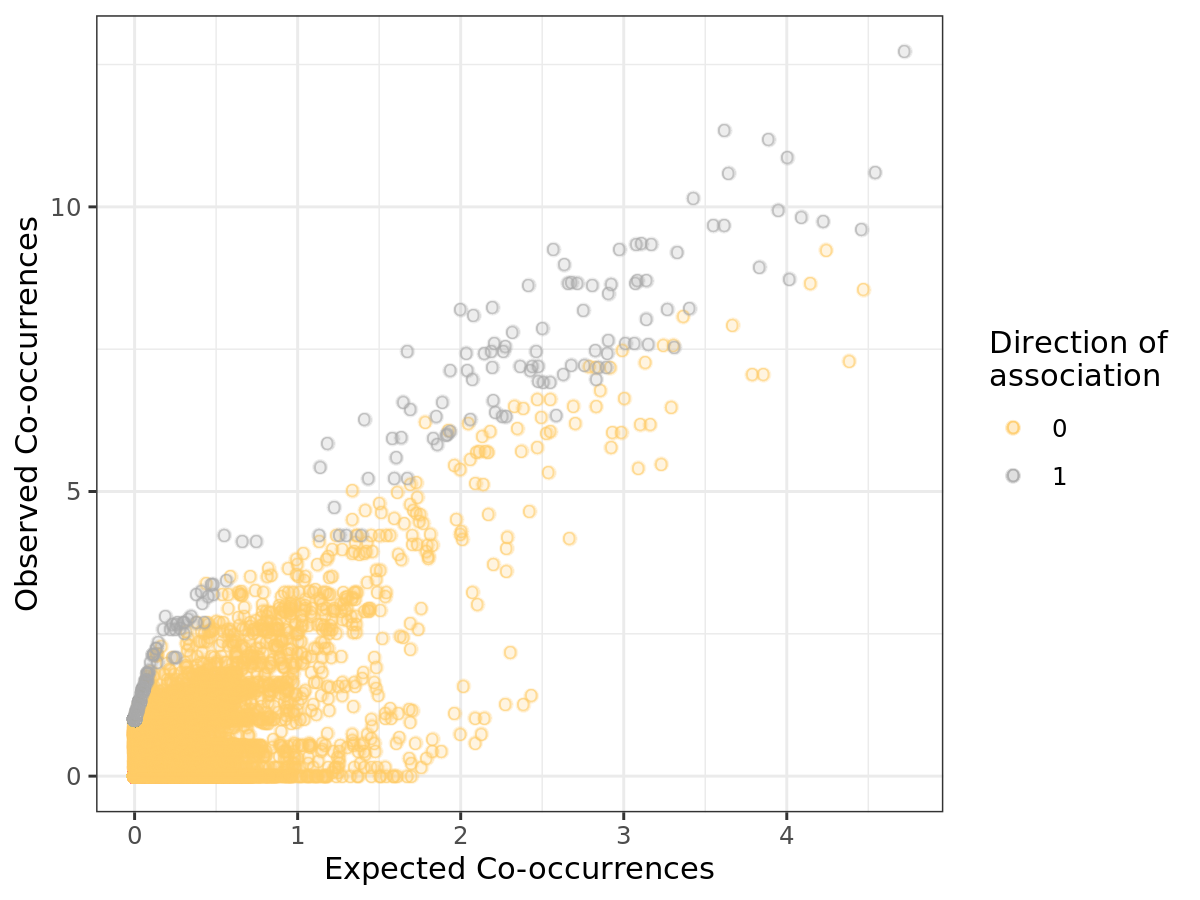

In [24]:
# plotting occurrences
p = eff %>%
    dt_filter(sign != 0) %>%
    ggplot(aes(x = exp_cooccur, y = obs_cooccur, color=as.character(sign))) + 
    geom_point(size=2, alpha=0.2,
               data = dt_filter(eff, sign == 0)) +
    geom_point(size=2, alpha=0.6, shape='O',
               data = dt_filter(eff, sign == 0), ) +
    geom_point(size=2, alpha=0.2) +
    geom_point(size=2, alpha=0.6, shape='O') +
    scale_color_manual('Direction of\nassociation', 
                       values=c("#FFCC66", "dark gray", "light blue")) +
    labs(x="Expected Co-occurrences", y="Observed Co-occurrences") +
    theme_bw()

p.dims(6,4.5)
plot(p)

In [25]:
# Summarizing by phylum
eff_s_p = eff %>%
    dt_mutate(n_edges = dt_n(), by=c(Phylum, i.Phylum)) %>%
    dt_summarize(perc_of_edges = dt_n() / first(n_edges) * 100, by=c(Phylum, i.Phylum, sign)) 

df.dims(30)
eff_s_p %>% dt_arrange(-perc_of_edges)
df.dims()

Phylum,i.Phylum,sign,perc_of_edges
<fct>,<fct>,<int>,<dbl>
Euryarchaeota,Euryarchaeota,0,98.241427
Euryarchaeota,Euryarchaeota,1,1.758573


In [26]:
# Summarizing by phylum;class
eff_s_pc = eff %>%
    dt_mutate(n_edges = dt_n(), by=c(Phylum, Class, i.Phylum, i.Class)) %>%
    dt_summarize(perc_of_edges = dt_n() / first(n_edges) * 100, 
                 by=c(Phylum, Class, i.Phylum, i.Class, sign)) 

df.dims(50)
eff_s_pc %>% dt_arrange(-perc_of_edges)
df.dims()

Phylum,Class,i.Phylum,i.Class,sign,perc_of_edges
<fct>,<fct>,<fct>,<fct>,<int>,<dbl>
Euryarchaeota,Halobacteria,Euryarchaeota,Methanomicrobia,0,100.0000000
Euryarchaeota,Halobacteria,Euryarchaeota,Thermoplasmata,0,100.0000000
Euryarchaeota,Halobacteria,Euryarchaeota,Methanobacteria,0,100.0000000
Euryarchaeota,Halobacteria,Euryarchaeota,unclassified,0,100.0000000
Euryarchaeota,Methanomicrobia,Euryarchaeota,unclassified,0,100.0000000
Euryarchaeota,Thermoplasmata,Euryarchaeota,unclassified,0,100.0000000
Euryarchaeota,Methanobacteria,Euryarchaeota,unclassified,0,100.0000000
Euryarchaeota,unclassified,Euryarchaeota,unclassified,1,100.0000000
Euryarchaeota,unclassified,Euryarchaeota,Methanobacteria,0,100.0000000


### Normalizing by number of nodes

In [27]:
# getting unique OTUs (& taxonomy)
n_nodes = eff %>%
    dt_select(sp1_name, sp2_name, Domain, Phylum, i.Domain, i.Phylum) %>%
    mutate(Tax1 = paste(Domain, Phylum, sp1_name, sep=';')) %>%
    mutate(Tax2 = paste(i.Domain, i.Phylum, sp2_name, sep=';')) 

n_nodes = c(n_nodes$Tax1 %>% as.vector %>% unique,
            n_nodes$Tax2 %>% as.vector %>% unique) %>%
    as.data.frame
colnames(n_nodes) = c('OTU')

n_nodes = n_nodes %>%
    dt_separate(OTU, c('Domain', 'Phylum', 'otu'), sep=';') %>%
    dt_distinct(Domain, Phylum, otu) %>%
    dt_summarize(n_OTUs = dt_n(), by=c(Domain, Phylum)) 

n_nodes 

Domain,Phylum,n_OTUs
<chr>,<chr>,<int>
Archaea,Euryarchaeota,253


In [28]:
# percent of nodes in taxonomic groups
x2 = eff_s_p %>%
    dt_inner_join(n_nodes, c('Phylum'='Phylum')) %>%
    dt_inner_join(n_nodes, c('i.Phylum'='Phylum')) %>%
    dt_summarize(edges_norm = dt_n() / (first(n_OTUs) + first(i.n_OTUs)),
              by=c(Phylum, i.Phylum, sign)) %>%
    dt_filter(sign != 0) %>%
    dt_mutate(edges_norm = round(edges_norm, 3)) %>%
    dt_arrange(sign, -edges_norm)

df.dims(30)
x2 
df.dims()

Phylum,i.Phylum,sign,edges_norm
<chr>,<chr>,<int>,<dbl>
Euryarchaeota,Euryarchaeota,1,0.002


## Graph

In [29]:
# convert to graph
G = eff %>%
    dt_select(-starts_with.('i.'), 
              -Domain, -Phylum, -Class, -Order, -Family, -Genus, -Species) %>%
    #dt_slice_head(n=1000) %>%      # debug
    as_tbl_graph
G

# A tbl_graph: 253 nodes and 31844 edges
#
# A directed acyclic simple graph with 1 component
#
# Node Data: 253 x 1 (active)
  name                            
  <chr>                           
1 c5fbed2bb10ab3a08275a92e9caea3c1
2 1936b1a270b058c5754be0addc7c7c31
3 6e9321684640a05dd16b7bc01b98c14a
4 2a64fe6cea748d320b2f99fe83449e46
5 0c59c44aeb355d3aa4dfa33ac4e77cde
6 458f7b9ac8ea99af3b251a761c878332
# … with 247 more rows
#
# Edge Data: 31,844 x 12
   from    to exp_cooccur obs_cooccur prob_cooccur  p_lt  p_gt  q_lt  q_gt
  <int> <int>       <dbl>       <dbl>        <dbl> <dbl> <dbl> <int> <dbl>
1     1     2           0           1        0.001     1     0     1     0
2     1     3           0           1        0.001     1     0     1     0
3     2     3           0           1        0.001     1     0     1     0
# … with 3.184e+04 more rows, and 3 more variables: mean_effects <dbl>,
#   sd_effects <dbl>, sign <int>

In [30]:
# adding taxonomy to nodes
## loading 
tax = physeq %>%
    phyloseq2df(tax_table)

## joining
G = G %>%
    activate(nodes) %>%
    inner_join(tax, c('name'='OTU'))
G

# A tbl_graph: 253 nodes and 31844 edges
#
# A directed acyclic simple graph with 1 component
#
# Node Data: 253 x 8 (active)
  name            Domain  Phylum    Class    Order     Family   Genus   Species 
  <chr>           <chr>   <chr>     <chr>    <chr>     <chr>    <chr>   <chr>   
1 c5fbed2bb10ab3… Archaea Euryarch… Halobac… Halobact… Halofer… Haloha… unclass…
2 1936b1a270b058… Archaea Euryarch… Halobac… Halobact… Halofer… Haloha… unclass…
3 6e9321684640a0… Archaea Euryarch… Halobac… Halobact… Halofer… unclas… unclass…
4 2a64fe6cea748d… Archaea Euryarch… Halobac… Halobact… Halofer… unclas… unclass…
5 0c59c44aeb355d… Archaea Euryarch… Halobac… Halobact… Halofer… unclas… unclass…
6 458f7b9ac8ea99… Archaea Euryarch… Halobac… Halobact… Halofer… unclas… unclass…
# … with 247 more rows
#
# Edge Data: 31,844 x 12
   from    to exp_cooccur obs_cooccur prob_cooccur  p_lt  p_gt  q_lt  q_gt
  <int> <int>       <dbl>       <dbl>        <dbl> <dbl> <dbl> <int> <dbl>
1     1     2           0 

In [31]:
# calculating weights based on effects
G = G %>%
    activate(edges) %>%
    mutate(weight = ifelse(mean_effects == 0, 1e-5, abs(mean_effects)))
G

# A tbl_graph: 253 nodes and 31844 edges
#
# A directed acyclic simple graph with 1 component
#
# Edge Data: 31,844 x 13 (active)
   from    to exp_cooccur obs_cooccur prob_cooccur  p_lt  p_gt  q_lt  q_gt
  <int> <int>       <dbl>       <dbl>        <dbl> <dbl> <dbl> <int> <dbl>
1     1     2           0           1        0.001     1     0     1     0
2     1     3           0           1        0.001     1     0     1     0
3     2     3           0           1        0.001     1     0     1     0
4     1     5           0           1        0.001     1     0     1     0
5     2     5           0           1        0.001     1     0     1     0
6     3     5           0           1        0.001     1     0     1     0
# … with 3.184e+04 more rows, and 4 more variables: mean_effects <dbl>,
#   sd_effects <dbl>, sign <int>, weight <dbl>
#
# Node Data: 253 x 8
  name            Domain  Phylum    Class    Order     Family   Genus   Species 
  <chr>           <chr>   <chr>     <chr>    <c

In [32]:
# centrality 
G = G %>%
    activate(nodes) %>%
    mutate(centrality_btw = centrality_betweenness(weights=weight),
           centrality_hub = centrality_hub(weights=weight),
           centrality_degree = centrality_degree(weights=weight))
G

# A tbl_graph: 253 nodes and 31844 edges
#
# A directed acyclic simple graph with 1 component
#
# Node Data: 253 x 11 (active)
  name  Domain Phylum Class Order Family Genus Species centrality_btw
  <chr> <chr>  <chr>  <chr> <chr> <chr>  <chr> <chr>            <dbl>
1 c5fb… Archa… Eurya… Halo… Halo… Halof… Halo… unclas…              0
2 1936… Archa… Eurya… Halo… Halo… Halof… Halo… unclas…              0
3 6e93… Archa… Eurya… Halo… Halo… Halof… uncl… unclas…              1
4 2a64… Archa… Eurya… Halo… Halo… Halof… uncl… unclas…              0
5 0c59… Archa… Eurya… Halo… Halo… Halof… uncl… unclas…              3
6 458f… Archa… Eurya… Halo… Halo… Halof… uncl… unclas…              0
# … with 247 more rows, and 2 more variables: centrality_hub <dbl>,
#   centrality_degree <dbl>
#
# Edge Data: 31,844 x 13
   from    to exp_cooccur obs_cooccur prob_cooccur  p_lt  p_gt  q_lt  q_gt
  <int> <int>       <dbl>       <dbl>        <dbl> <dbl> <dbl> <int> <dbl>
1     1     2           0           1   

### Centrality

In [33]:
# summary
df.dims(30)
G %>% 
    activate(edges) %>%
    filter(sign != 0) %>%
    activate(nodes) %>%
    as.data.frame %>%
    group_by(Phylum, Class, Order, Family) %>%
    summarize(mean_centrality_btw = mean(centrality_btw),
              mean_centrality_hub = mean(centrality_hub),
              mean_centrality_degree = mean(centrality_degree)) %>%
    ungroup() %>%
    arrange(-mean_centrality_btw)
df.dims()

Phylum,Class,Order,Family,mean_centrality_btw,mean_centrality_hub,mean_centrality_degree
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
Euryarchaeota,Methanomicrobia,Methanosarcinales,Methanosarcinaceae,716.2021871,0.12494013,0.7449771
Euryarchaeota,Thermoplasmata,Methanomassiliicoccales,Methanomethylophilaceae,274.5521936,0.10398358,0.6350062
Euryarchaeota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,146.1497034,0.13168479,0.6497341
Euryarchaeota,Methanobacteria,Methanobacteriales,Methanothermobacteraceae,121.5697150,0.09723153,0.6713751
Euryarchaeota,unclassified,unclassified,unclassified,93.9642058,0.17421252,0.6761063
Euryarchaeota,Methanomicrobia,Methanomicrobiales,Methanocorpusculaceae,85.1599050,0.08324425,0.6591950
Euryarchaeota,Halobacteria,Halobacteriales,Halococcaceae,23.0000000,0.08051071,0.4936960
Euryarchaeota,Halobacteria,Halobacteriales,Haloferacaceae,0.7826087,0.05262780,0.5546860
Euryarchaeota,Halobacteria,Halobacteriales,Halomicrobiaceae,0.0000000,0.05302908,0.2556055


In [34]:
G_f = G %>%
    activate(edges) %>%
    filter(sign != 0) %>%
    activate(nodes) %>%
    mutate(community = as.factor(group_walktrap(weights=weight))) %>%
    mutate(centrality_btw = centrality_betweenness(weights=weight),
           centrality_hub = centrality_hub(weights=weight),
           centrality_degree = centrality_degree(weights=weight),
           d = local_ave_degree()) %>%
    filter(!is.na(d)) 
G_f 

# A tbl_graph: 185 nodes and 560 edges
#
# A directed acyclic simple graph with 36 components
#
# Node Data: 185 x 13 (active)
  name  Domain Phylum Class Order Family Genus Species centrality_btw
  <chr> <chr>  <chr>  <chr> <chr> <chr>  <chr> <chr>            <dbl>
1 c5fb… Archa… Eurya… Halo… Halo… Halof… Halo… unclas…              0
2 1936… Archa… Eurya… Halo… Halo… Halof… Halo… unclas…              0
3 6e93… Archa… Eurya… Halo… Halo… Halof… uncl… unclas…              0
4 2a64… Archa… Eurya… Halo… Halo… Halof… uncl… unclas…              1
5 0c59… Archa… Eurya… Halo… Halo… Halof… uncl… unclas…              0
6 458f… Archa… Eurya… Halo… Halo… Halof… uncl… unclas…              0
# … with 179 more rows, and 4 more variables: centrality_hub <dbl>,
#   centrality_degree <dbl>, community <fct>, d <dbl>
#
# Edge Data: 560 x 13
   from    to exp_cooccur obs_cooccur prob_cooccur  p_lt  p_gt  q_lt  q_gt
  <int> <int>       <dbl>       <dbl>        <dbl> <dbl> <dbl> <int> <dbl>
1     1     2    

### Assortativity

In [47]:
# assortivity
assort_by_tax_lev = function(G){
    L = list()
    L[['Phylum']] = G %>%
        activate(nodes) %>%
        mutate(Taxonomy = paste(Phylum, sep=';')) %>%
        mutate(assort_by_tax = graph_assortativity(Taxonomy, directed=FALSE)) %>%
        as.data.frame %>%
        .$assort_by_tax %>% first
    
    L[['Class']] = G %>%
        activate(nodes) %>%
        mutate(Taxonomy = paste(Phylum, Class, sep=';')) %>%
        mutate(assort_by_tax = graph_assortativity(Taxonomy, directed=FALSE)) %>%
        as.data.frame %>%
        .$assort_by_tax %>% first
    
    L[['Order']] = G %>%
        activate(nodes) %>%
        mutate(Taxonomy = paste(Phylum, Class, Order, sep=';')) %>%
        mutate(assort_by_tax = graph_assortativity(Taxonomy, directed=FALSE)) %>%
        as.data.frame %>%
        .$assort_by_tax %>% first
    
    L[['Family']] = G %>%
        activate(nodes) %>%
        mutate(Taxonomy = paste(Phylum, Class, Order, Family, sep=';')) %>%
        mutate(assort_by_tax = graph_assortativity(Taxonomy, directed=FALSE)) %>%
        as.data.frame %>%
        .$assort_by_tax %>% first
    
    L[['Genus']] = G %>%
        activate(nodes) %>%
        mutate(Taxonomy = paste(Phylum, Class, Order, Family, Genus, sep=';')) %>%
        mutate(assort_by_tax = graph_assortativity(Taxonomy, directed=FALSE)) %>%
        as.data.frame %>%
        .$assort_by_tax %>% first
    
    assort_by_tax = L %>% unlist %>% as.data.frame
    colnames(assort_by_tax) = c('assortativity')
    assort_by_tax$tax_level = rownames(assort_by_tax)
    return(assort_by_tax)
}

assort_by_tax = G_f %>%
    activate(edges) %>%
    filter(sign == 1) %>%
    assort_by_tax_lev() %>%
    mutate(assortativity = assortativity %>% as.Num,
           assortativity = ifelse(is.na(assortativity), 1, assortativity))

df.dims(10)
assort_by_tax
df.dims()

assortativity,tax_level
<dbl>,<chr>
1.0000000,Phylum
0.8535730,Class
0.8536548,Order
0.7444642,Family
0.4032407,Genus


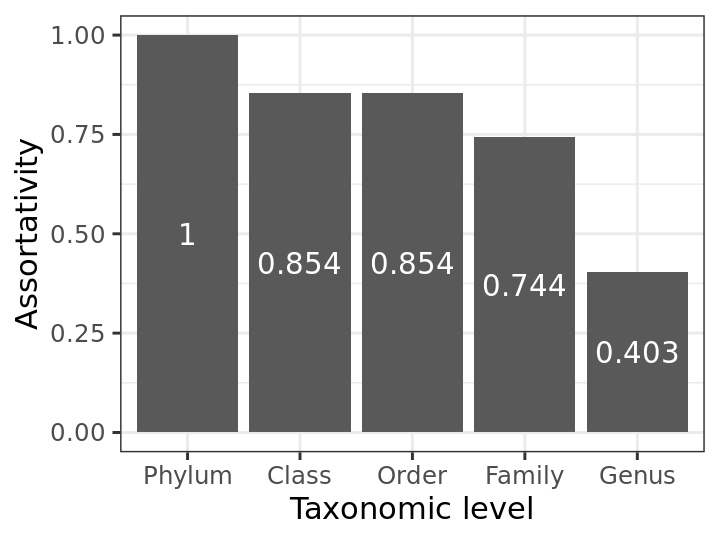

In [48]:
# plotting
tax_levs = c('Phylum', 'Class', 'Order', 'Family', 'Genus')
p = assort_by_tax %>%
    mutate(tax_level = factor(tax_level, levels=tax_levs)) %>%
    ggplot(aes(tax_level, assortativity)) +
    geom_bar(stat='identity') +
    geom_text(aes(label=round(assortativity, 3), y=assortativity/2), 
              size=3.7, color='white') +
    scale_y_continuous(limits=c(0,1)) +
    labs(x='Taxonomic level', y='Assortativity') +
    theme_bw()

p.dims(3.6,2.7)
plot(p)

#### Versus null model

*  simulating 100 random networks
* same number of edges as true network, but randomly assigned

In [49]:
# simulating 100 random networks
## same number of edges, but random
n_edges = G %>%
    activate(edges) %>%
    filter(sign == 1) %>%
    as.data.frame %>%
    nrow
n_edges

[1] 560

In [50]:
# function to simulate a graph with random edges 
sim_graph = function(G){
    all_nodes = G %>%
        activate(nodes) %>%
        as.data.frame %>%
        .$name %>% unique
    #cat('Number of nodes:', length(all_nodes), '\n')
    df_edges = combn(1:length(all_nodes),m=2)
    df_edges = df_edges[,sample(1:ncol(df_edges), n_edges)]
    df_edges = data.frame(to=df_edges[1,],
                          from=df_edges[2,],
                          sign=1)
    #cat('Number of edges:', nrow(df_edges), '\n')
    G %>%
        activate(edges) %>%
        filter(sign == 1e9) %>%
        bind_edges(df_edges) 
}

G %>%
    activate(edges) %>%
    filter(sign == 1) %>%
    sim_graph()    

# A tbl_graph: 253 nodes and 560 edges
#
# A directed acyclic simple graph with 2 components
#
# Edge Data: 560 x 13 (active)
   from    to exp_cooccur obs_cooccur prob_cooccur  p_lt  p_gt  q_lt  q_gt
  <int> <int>       <dbl>       <dbl>        <dbl> <dbl> <dbl> <int> <dbl>
1   230    78          NA          NA           NA    NA    NA    NA    NA
2   120   107          NA          NA           NA    NA    NA    NA    NA
3   245   193          NA          NA           NA    NA    NA    NA    NA
4   156   136          NA          NA           NA    NA    NA    NA    NA
5   204   173          NA          NA           NA    NA    NA    NA    NA
6   206   147          NA          NA           NA    NA    NA    NA    NA
# … with 554 more rows, and 4 more variables: mean_effects <dbl>,
#   sd_effects <dbl>, sign <dbl>, weight <dbl>
#
# Node Data: 253 x 11
  name  Domain Phylum Class Order Family Genus Species centrality_btw
  <chr> <chr>  <chr>  <chr> <chr> <chr>  <chr> <chr>            <db

In [51]:
# function to run simuation & assortativity 
assort_each = function(sim_rep, G){
    df = sim_graph(G) %>%
        assort_by_tax_lev 
    df$sim_rep = sim_rep
    return(df)
}

G_tmp = G %>%
    activate(edges) %>%
    filter(sign == 1)

n_sim_reps = 100
assort_null = 1:n_sim_reps %>%
    lapply(assort_each, G=G_tmp) %>%
    do.call(rbind, .) %>%
    mutate(assortativity = assortativity %>% as.Num,
           assortativity = ifelse(is.na(assortativity), 1, assortativity))
assort_null

assortativity,tax_level,sim_rep
<dbl>,<chr>,<int>
1.00000000,Phylum,1
0.02858447,Class,1
⋮,⋮,⋮
0.03919906,Family,100
0.01694338,Genus,100


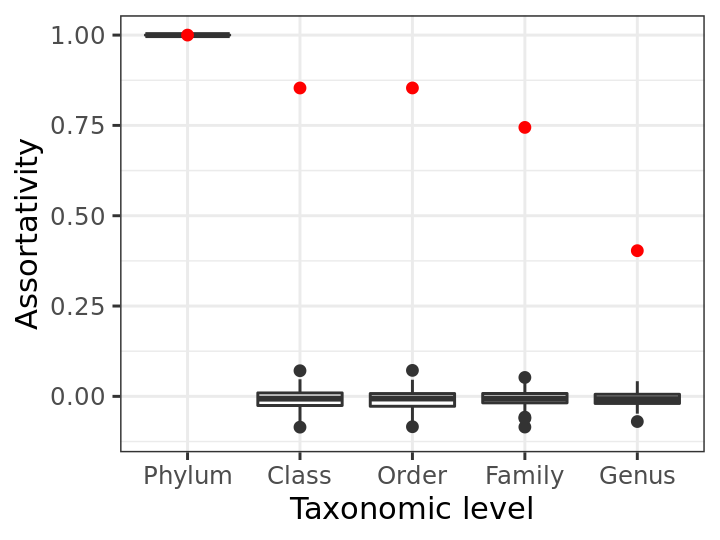

In [52]:
# plotting
p = assort_null %>%
    mutate(tax_level = tax_level %>% factor(levels=tax_levs)) %>%
    ggplot(aes(tax_level, assortativity)) + 
    geom_boxplot() +
    geom_point(data=assort_by_tax, color='red') +
    scale_y_continuous(limits=c(-0.1, 1)) +
    labs(x='Taxonomic level', y='Assortativity') +
    theme_bw() 

p.dims(3.6,2.7)
plot(p)

In [53]:
# p-value calc
df.dims(20)
assort_by_tax %>%
    inner_join(assort_null, c('tax_level')) %>%
    group_by(tax_level) %>%
    summarize(p_val = 1 - (sum(assortativity.x > assortativity.y) / n_sim_reps))
df.dims()

tax_level,p_val
<chr>,<dbl>
Class,0
Family,0
Genus,0
Order,0
Phylum,1


### Plotting

#### Top 6 subnetworks

In [54]:
# frac of nodes
G_f %>%
    activate(nodes) %>%
    filter(as.Num(community) <= 6) %>%
    as.data.frame %>%
    nrow

G_f %>%
    activate(nodes) %>%
    as.data.frame %>%
    nrow

[1] 90

[1] 185

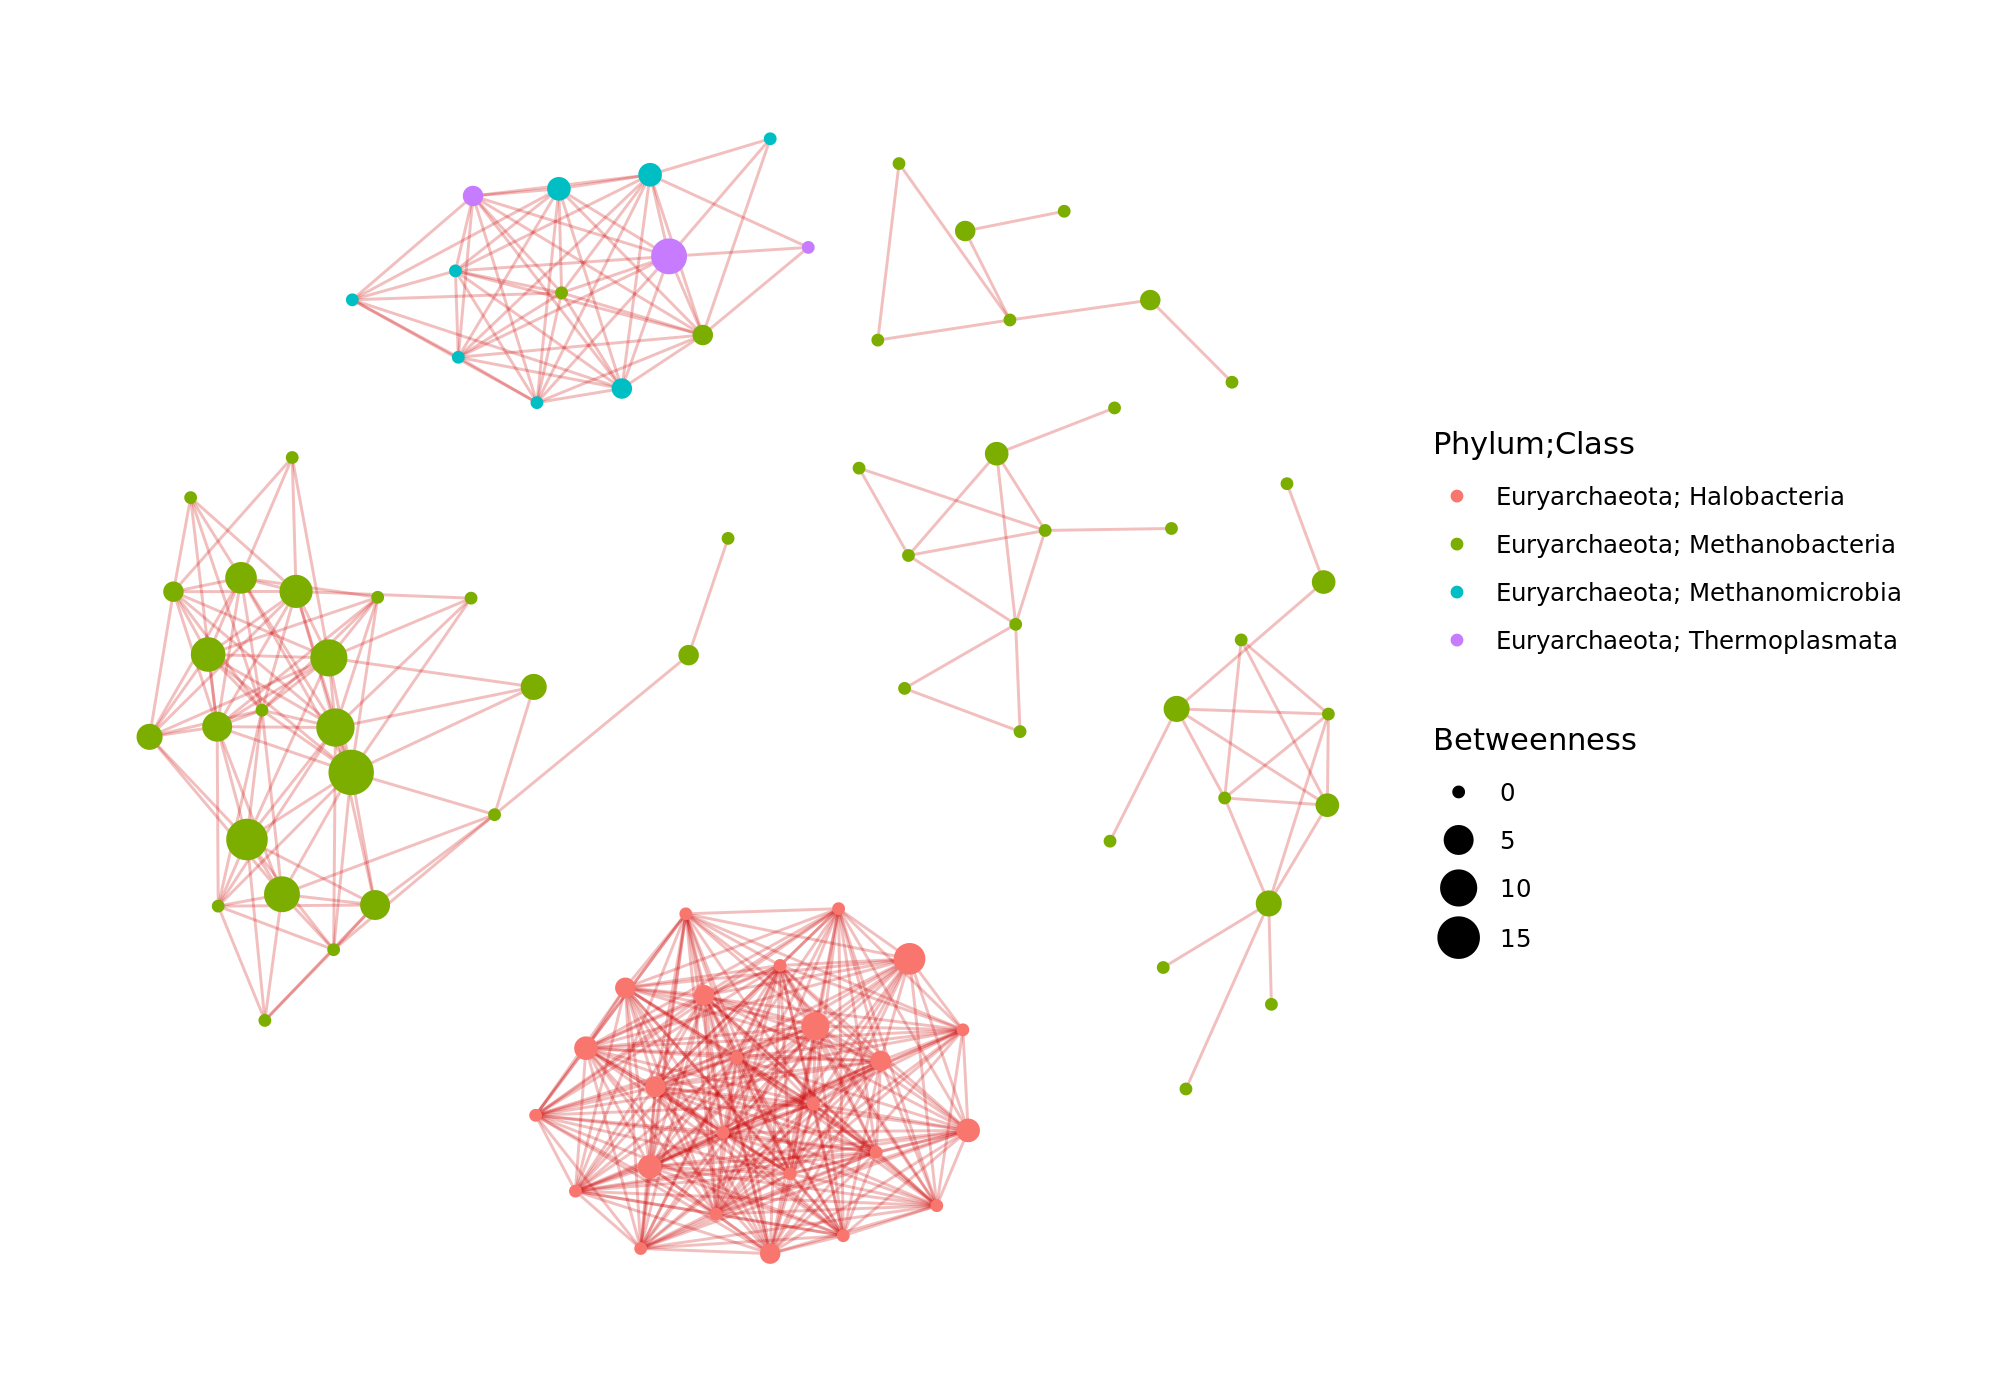

In [55]:
p = G_f %>%
    activate(nodes) %>%
    filter(as.Num(community) <= 6) %>%
    mutate(Taxonomy = paste(Phylum, Class, sep='; '),
           Taxonomy = stringr::str_wrap(Taxonomy, 40)) %>%
    ggraph(layout = 'nicely') + 
    geom_edge_fan(aes(edge_colour=as.character(sign)), show.legend=FALSE, alpha=0.25) + 
    geom_node_point(aes(size=centrality_btw, color=Taxonomy)) +
    scale_color_discrete('Phylum;Class') +
    scale_size_continuous('Betweenness', range=c(1.5,7)) +
    scale_edge_color_manual(values=c('#cc0000', '#339900')) + 
    theme_graph(base_family = 'Helvetica') 

p.dims(10,7)
plot(p)

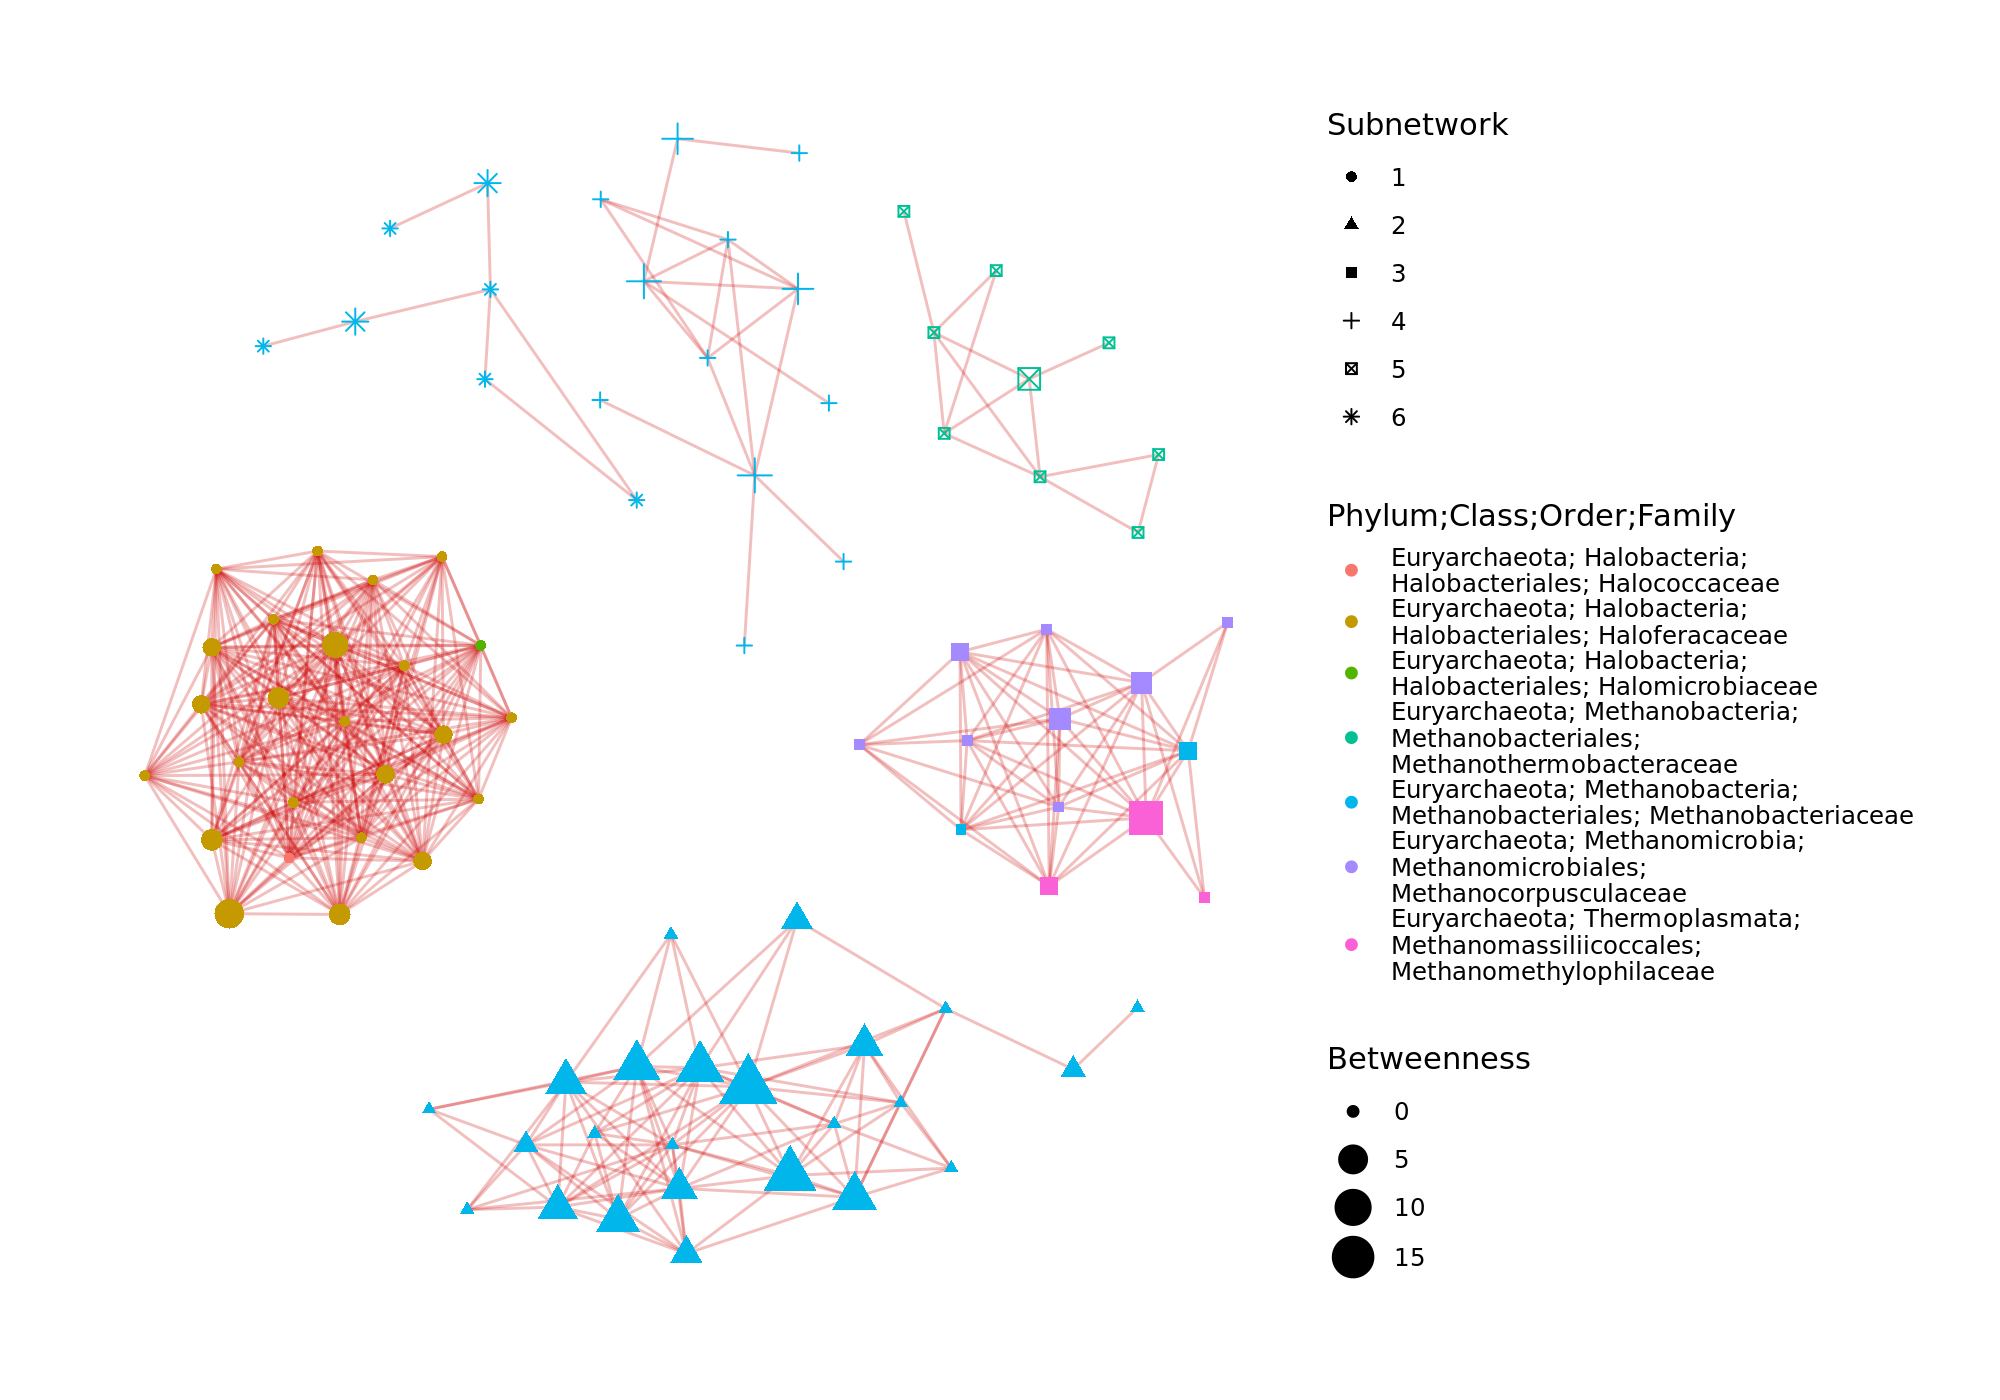

In [56]:
p = G_f %>%
    activate(nodes) %>%
    filter(as.Num(community) <= 6) %>%
    mutate(Taxonomy = paste(Phylum, Class, Order, Family, sep='; '),
           Taxonomy = stringr::str_wrap(Taxonomy, 40)) %>%
    ggraph(layout = 'nicely') + 
    geom_edge_fan(aes(edge_colour=as.character(sign)), show.legend=FALSE, alpha=0.25) + 
    geom_node_point(aes(size=centrality_btw, color=Taxonomy, shape=community)) +
    scale_color_discrete('Phylum;Class;Order;Family') +
    scale_size_continuous('Betweenness', range=c(1.5,7)) +
    scale_edge_color_manual(values=c('#cc0000', '#339900')) + 
    scale_shape_discrete('Subnetwork') +
    theme_graph(base_family = 'Helvetica') 

p.dims(10,7)
plot(p)

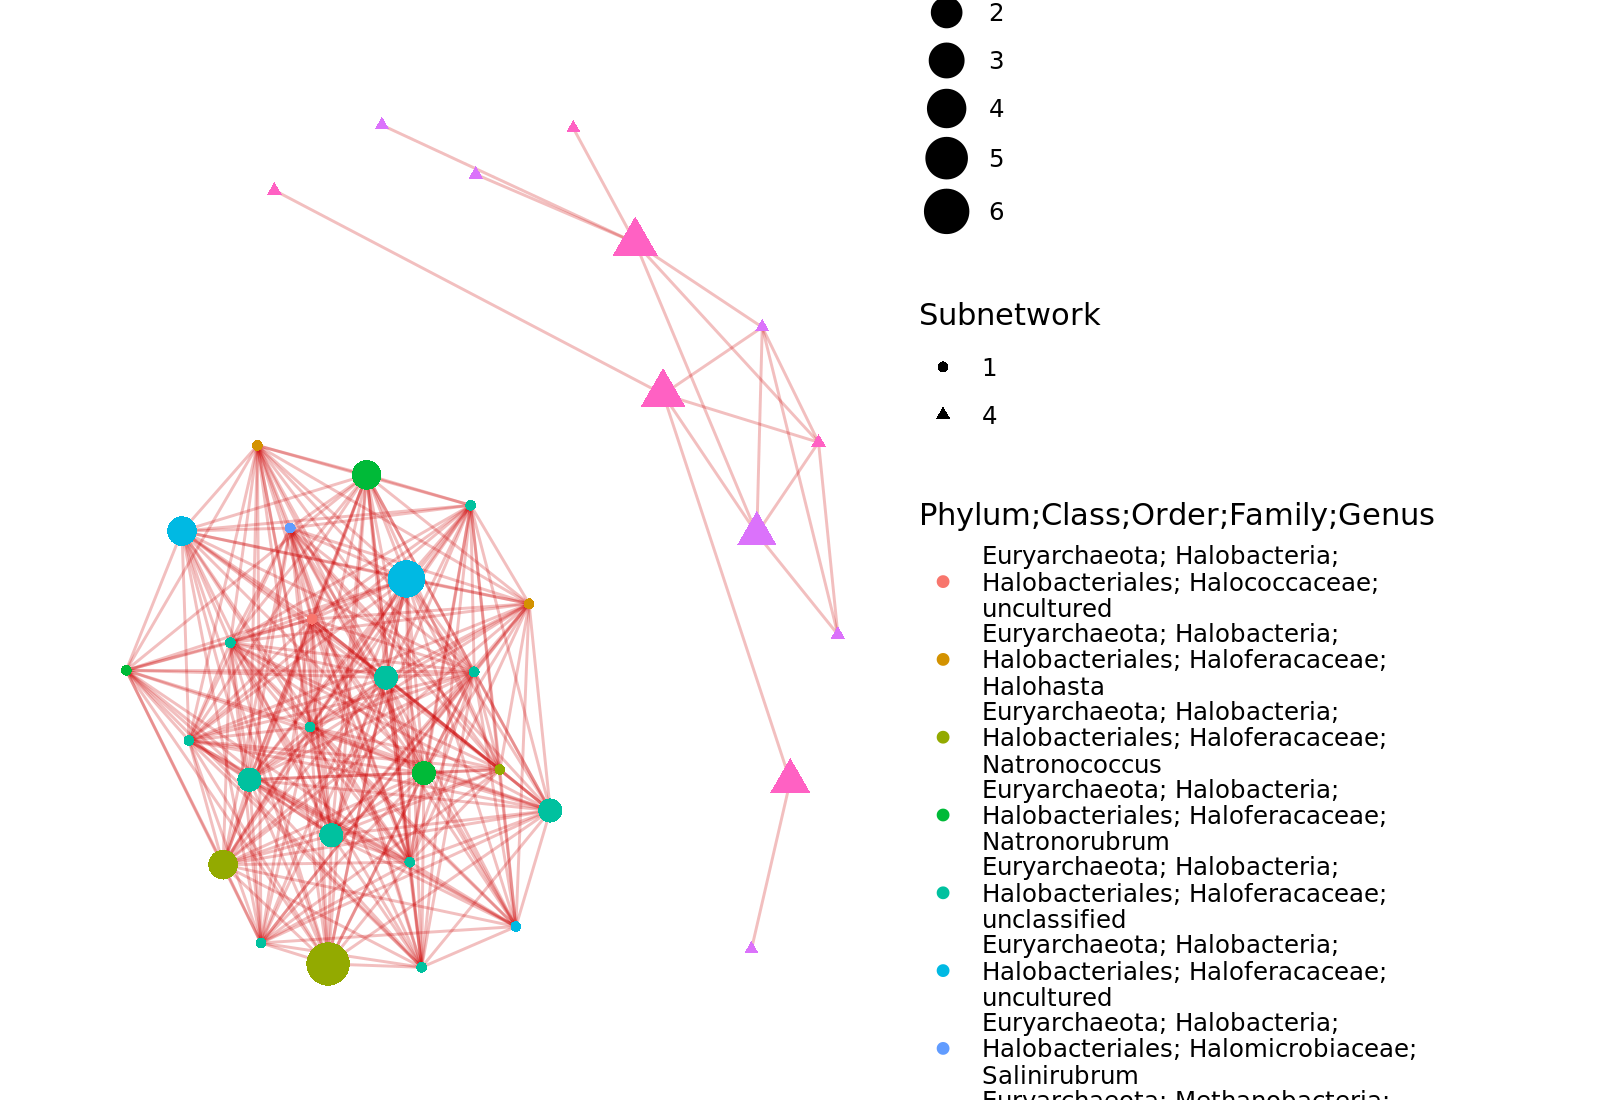

In [57]:
p = G_f %>%
    activate(nodes) %>%
    filter(as.Num(community) %in% c(1,4)) %>%
    mutate(Taxonomy = paste(Phylum, Class, Order, Family, Genus, sep='; '),
           Taxonomy = stringr::str_wrap(Taxonomy, 40)) %>%
    ggraph(layout = 'nicely') + 
    geom_edge_fan(aes(edge_colour=as.character(sign)), show.legend=FALSE, alpha=0.25) + 
    geom_node_point(aes(size=centrality_btw, color=Taxonomy, shape=community)) +
    scale_color_discrete('Phylum;Class;Order;Family;Genus') +
    scale_size_continuous('Betweenness', range=c(1.5,7)) +
    scale_shape_discrete('Subnetwork') +
    scale_edge_color_manual(values=c('#cc0000', '#339900')) + 
    theme_graph(base_family = 'Helvetica') 

p.dims(8,5.5)
plot(p)

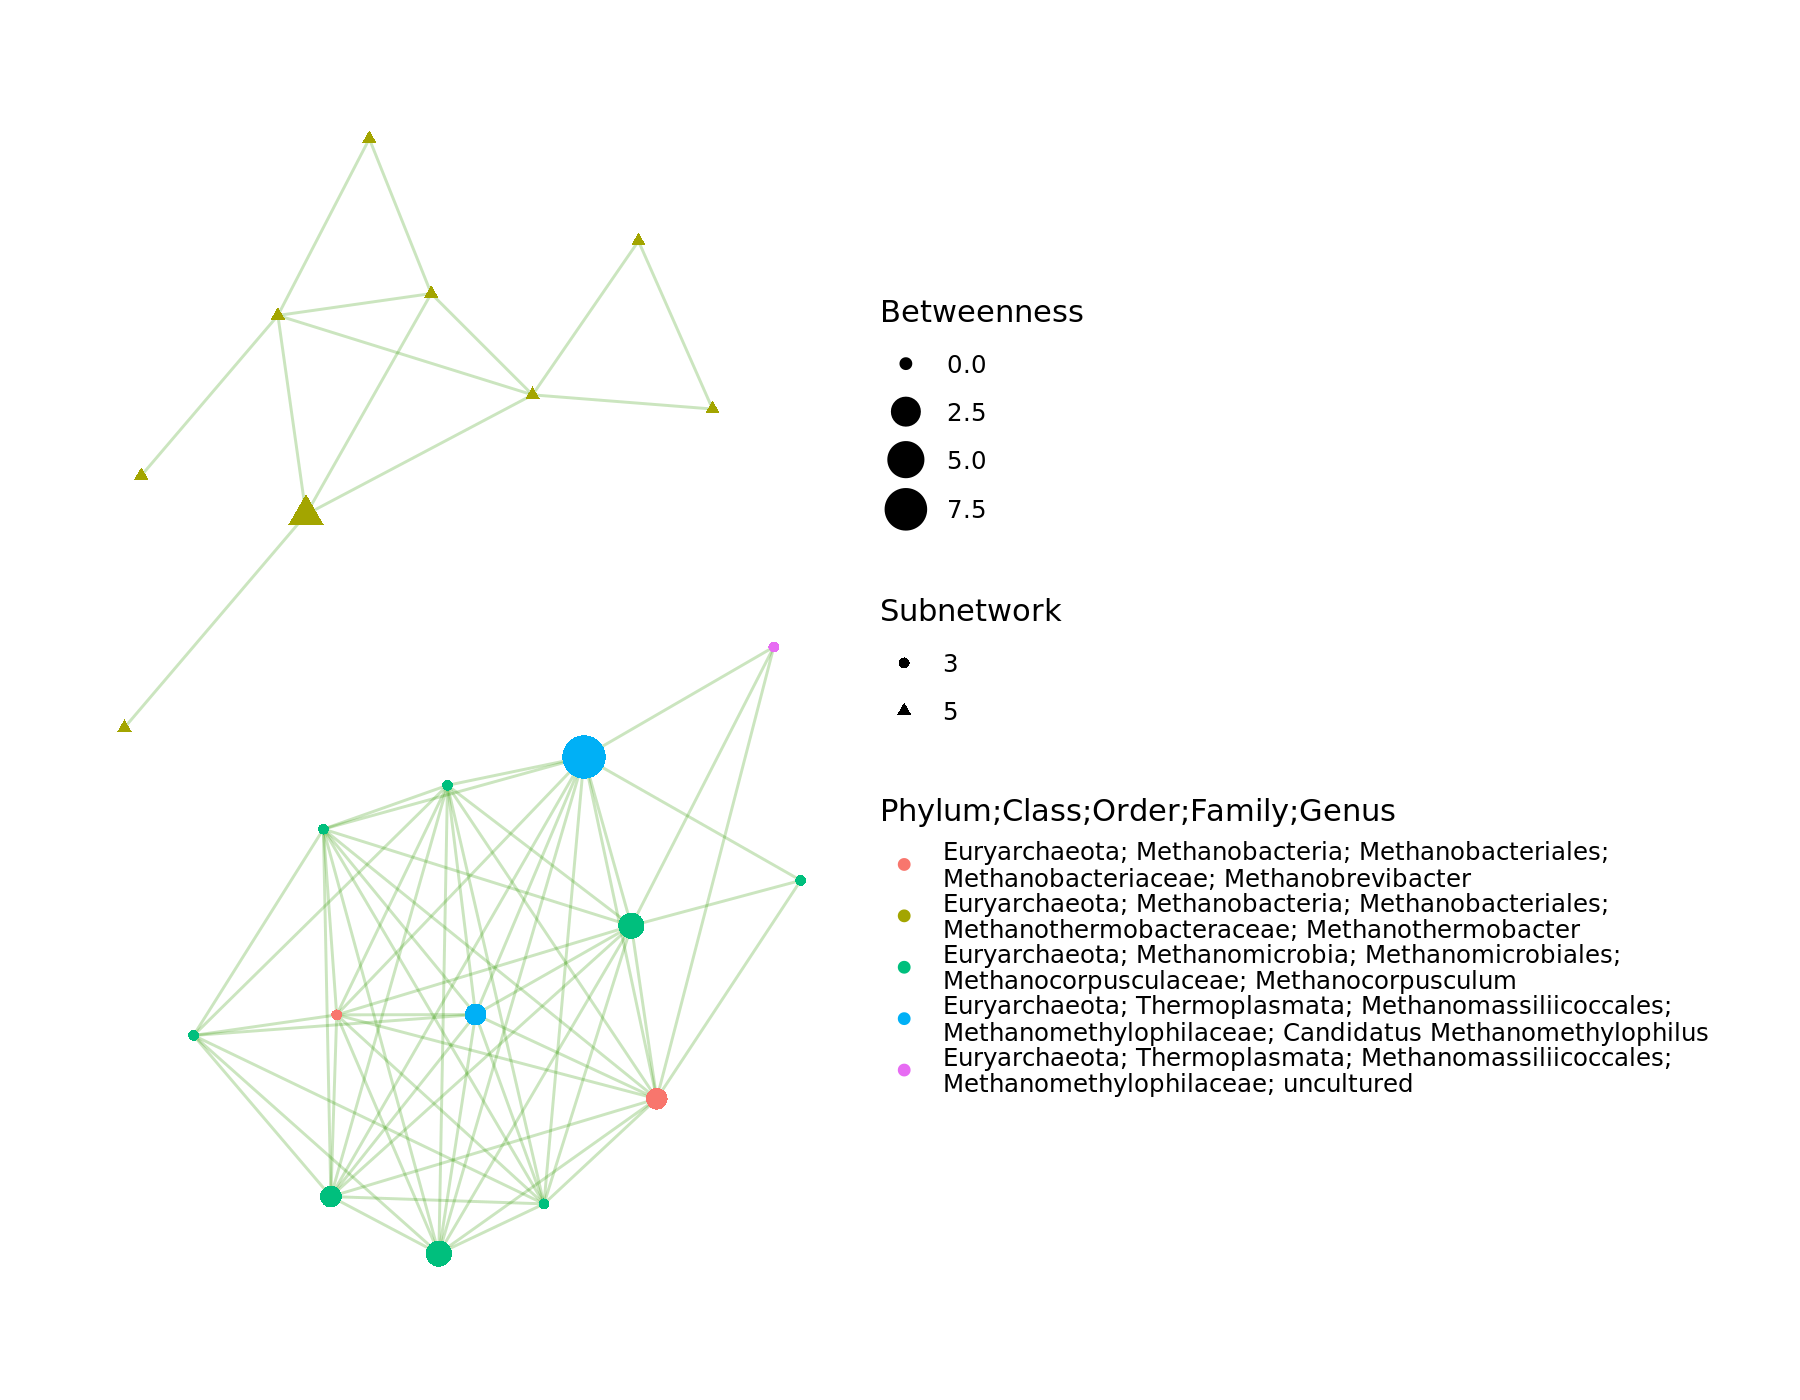

In [58]:
p = G_f %>%
    activate(nodes) %>%
    filter(as.Num(community) %in% c(3,5)) %>%
    mutate(Taxonomy = paste(Phylum, Class, Order, Family, Genus, sep='; '),
           Taxonomy = stringr::str_wrap(Taxonomy, 60)) %>%
    ggraph(layout = 'nicely') + 
    geom_edge_fan(aes(edge_colour=as.character(sign)), show.legend=FALSE, alpha=0.25) + 
    geom_node_point(aes(size=centrality_btw, color=Taxonomy, shape=community)) +
    scale_color_discrete('Phylum;Class;Order;Family;Genus') +
    scale_size_continuous('Betweenness', range=c(1.5,7)) +
    scale_shape_discrete('Subnetwork') +
    scale_edge_color_manual(values=c('#339900')) + 
    theme_graph(base_family = 'Helvetica') 

p.dims(9,7)
plot(p)

#### Top 19 subnetworks

In [71]:
# frac of nodes
G_f %>%
    activate(nodes) %>%
    filter(as.Num(community) <= 19) %>%
    as.data.frame %>%
    nrow

G_f %>%
    activate(nodes) %>%
    as.data.frame %>%
    nrow

[1] 148

[1] 185

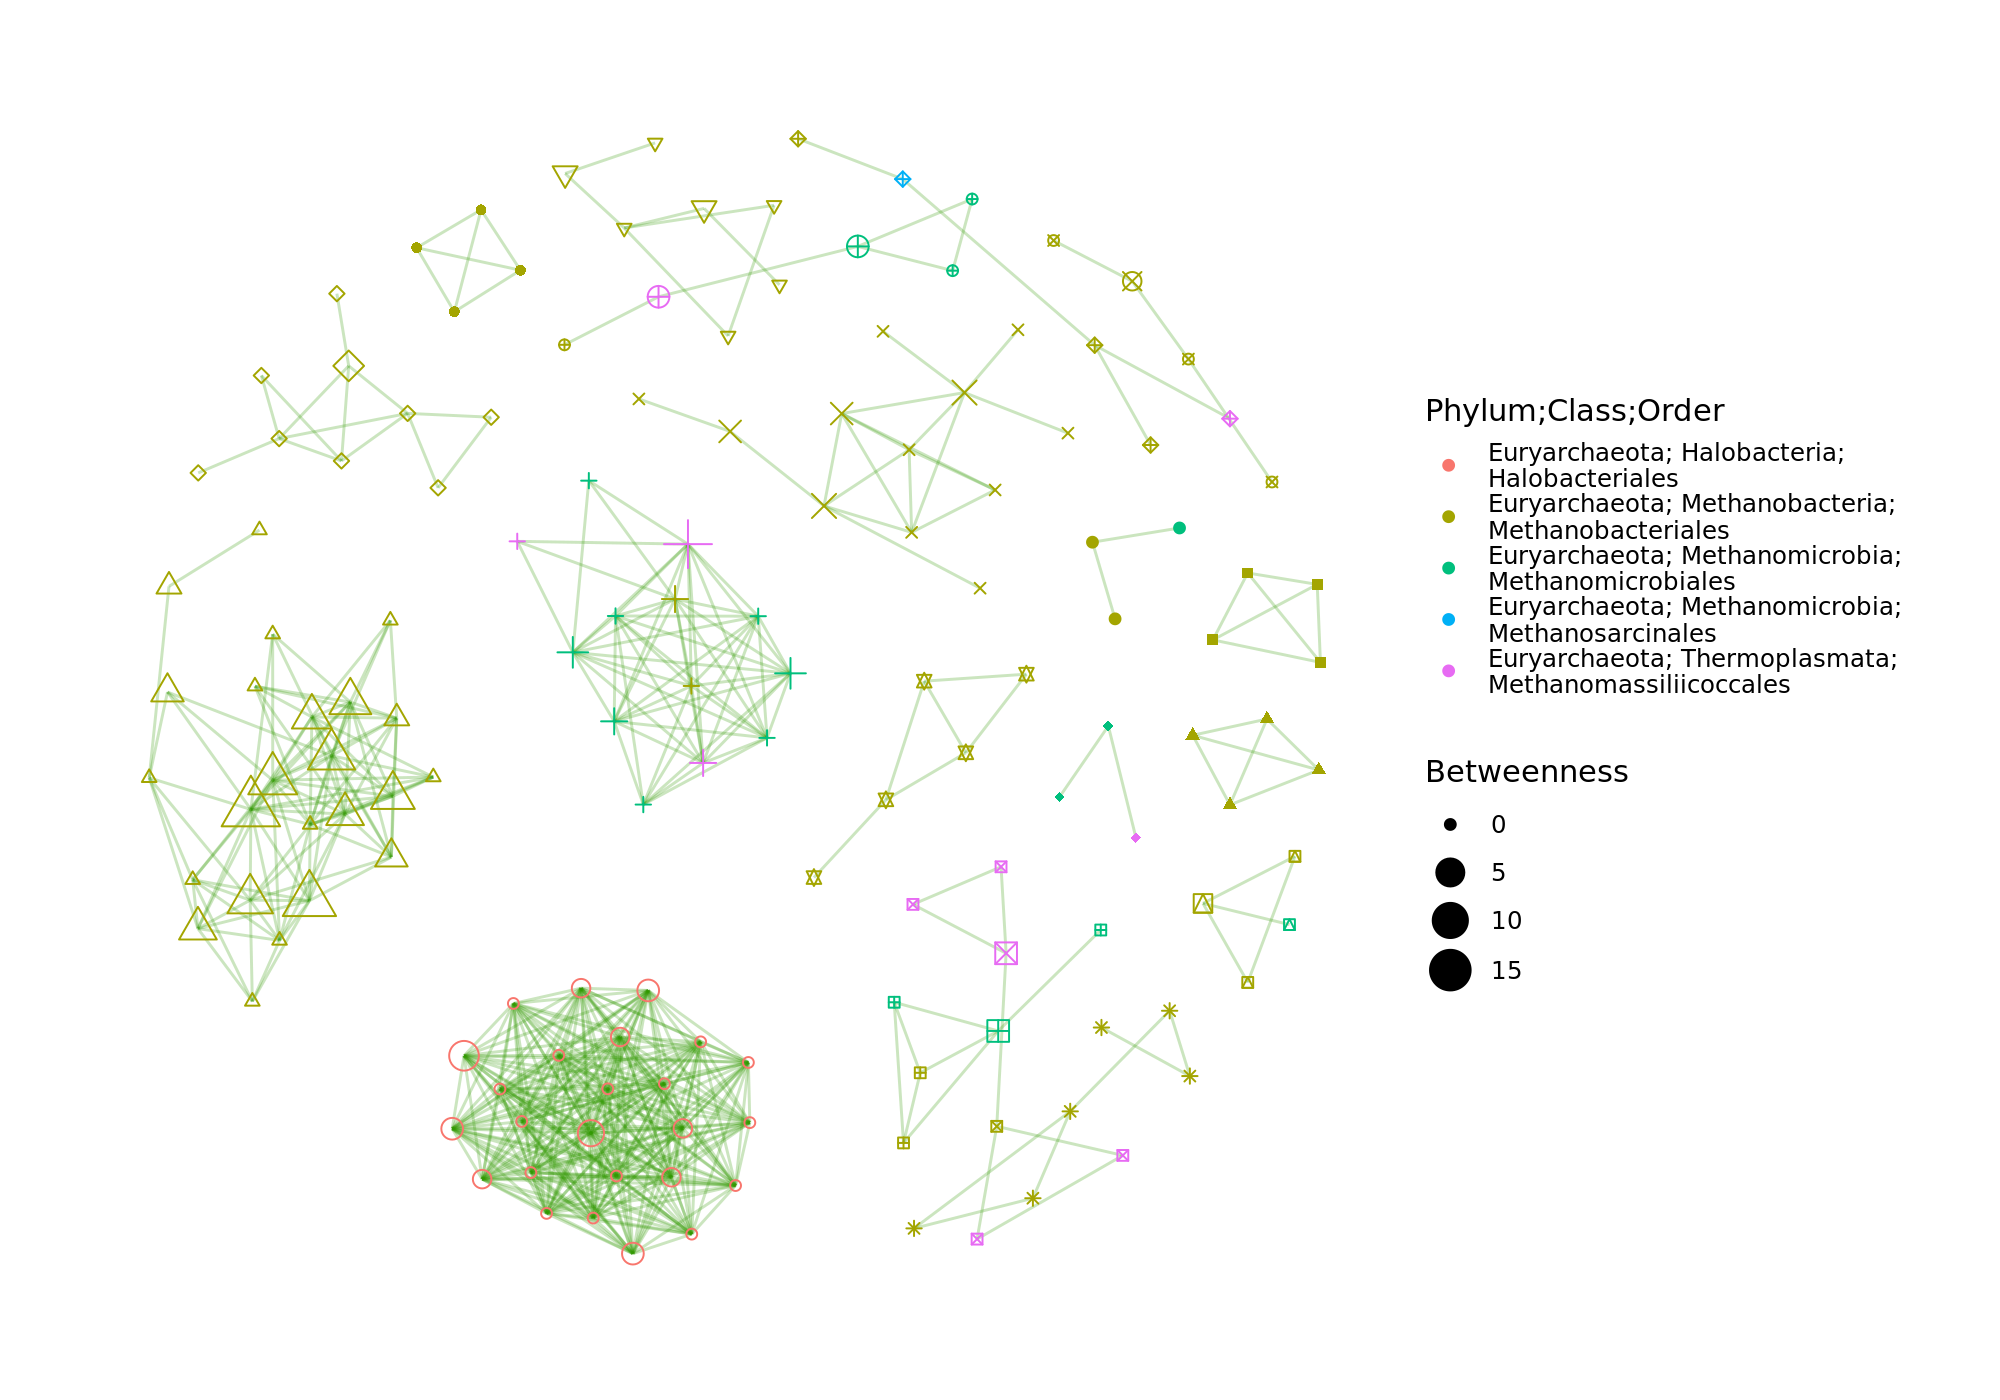

In [73]:
p = G_f %>%
    activate(nodes) %>%
    filter(as.Num(community) <= 19) %>%
    mutate(Taxonomy = paste(Phylum, Class, Order, sep='; '),
           Taxonomy = stringr::str_wrap(Taxonomy, 40)) %>%
    ggraph(layout = 'nicely') + 
    geom_edge_fan(aes(edge_colour=as.character(sign)), show.legend=FALSE, alpha=0.25) + 
    geom_node_point(aes(size=centrality_btw, color=Taxonomy, shape=community)) +
    scale_color_discrete('Phylum;Class;Order') +
    scale_size_continuous('Betweenness', range=c(1.5,7)) +
    scale_edge_color_manual(values=c('#339900')) +  # '#cc0000',
    scale_shape_manual('Subnetwork', values=1:19) +
    theme_graph(base_family = 'Helvetica') +
    guides(shape=FALSE)

p.dims(10,7)
plot(p)

#### Summary

In [61]:
# formatting
df = G_f %>%
    activate(nodes) %>%
    as.data.frame %>%
    unite(Taxonomy, Phylum, Class, Order, Family, Genus, sep='; ') %>%
    group_by(Taxonomy, community) %>%
    mutate(centrality_btw_mean = mean(centrality_btw)) %>%
    ungroup() %>%
    filter(centrality_btw_mean > 5)
df 

name,Domain,Taxonomy,Species,centrality_btw,centrality_hub,centrality_degree,community,d,centrality_btw_mean
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>


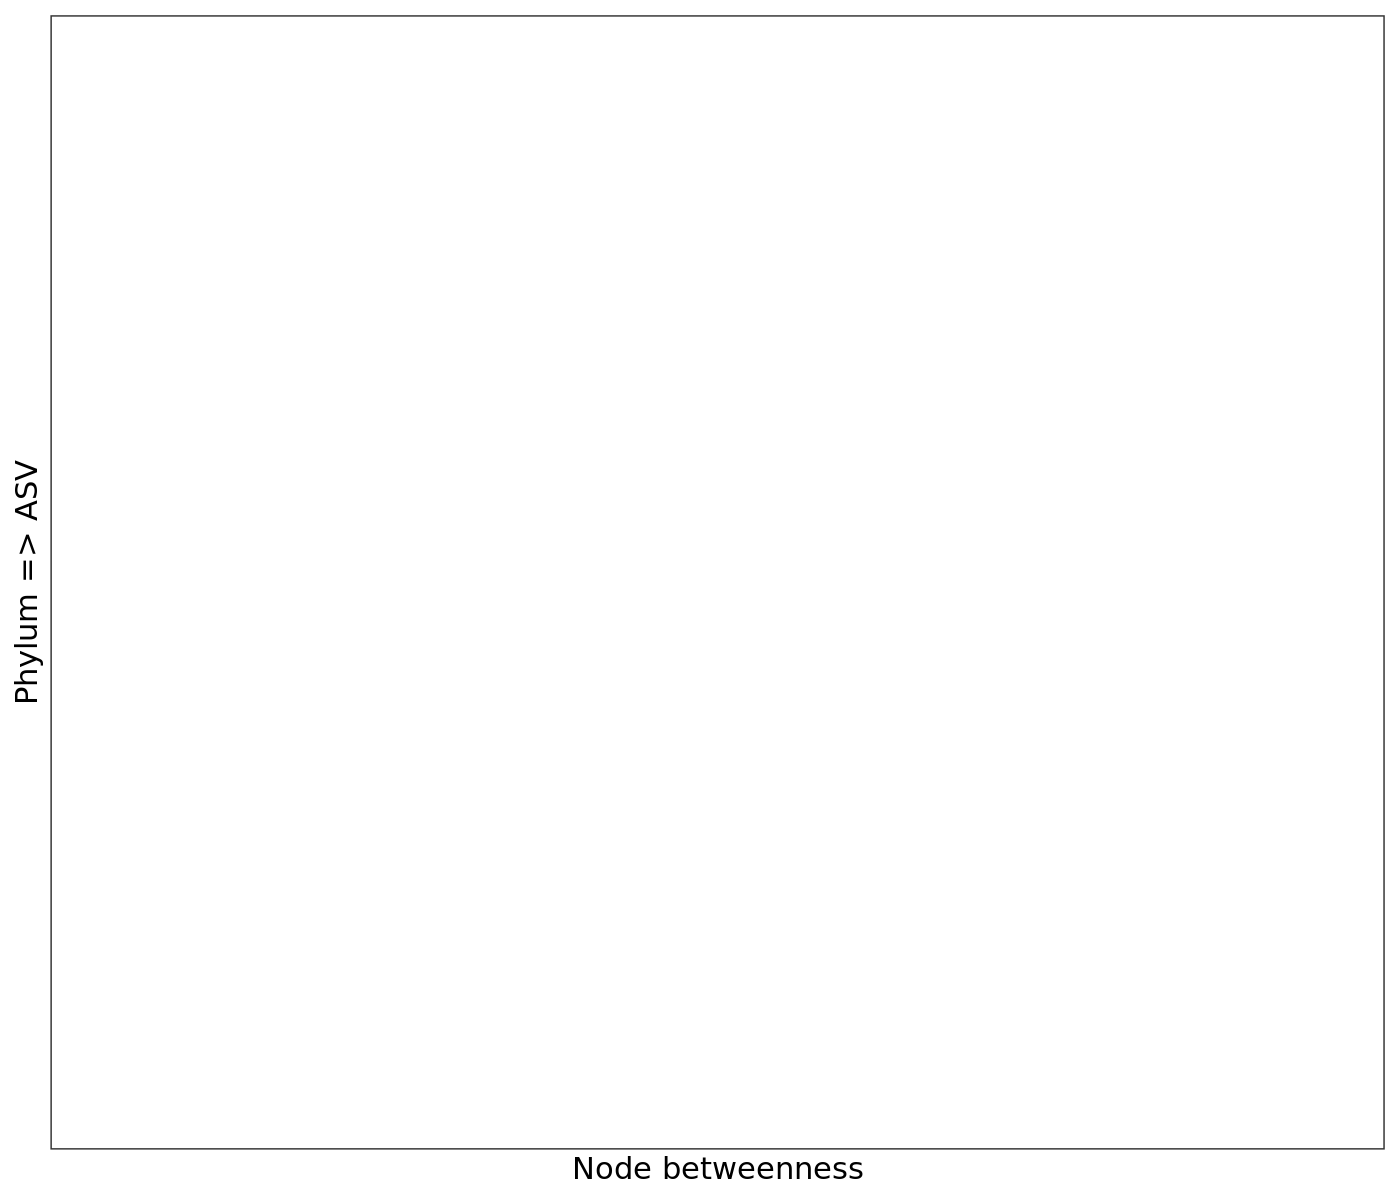

In [62]:
p = df %>%
    mutate(Taxonomy = stringr::str_wrap(Taxonomy, 60),
           Taxonomy = Taxonomy %>% reorder(centrality_btw_mean)) %>%
    ggplot(aes(Taxonomy, centrality_btw, color=community)) +
    geom_boxplot() +
    #geom_bar(stat='identity', position='dodge') +
    scale_color_discrete('Subnetwork') +
    labs(x='Phylum => ASV', y='Node betweenness') +
    coord_flip() +
    theme_bw() +
    theme(
        axis.text.y = element_text(size=8)
    )

p.dims(7,6)
plot(p)

In [63]:
# formatting
df = G_f %>%
    activate(nodes) %>%
    as.data.frame %>%
    unite(Taxonomy, Phylum, Class, Order, Family, Genus, name, sep='; ') %>%
    dplyr::select(Taxonomy, community, centrality_btw) %>%
    filter(centrality_btw > 50) %>%
    arrange(-centrality_btw) 
df.dims(30)
df 
df.dims()

Taxonomy,community,centrality_btw
<chr>,<fct>,<dbl>


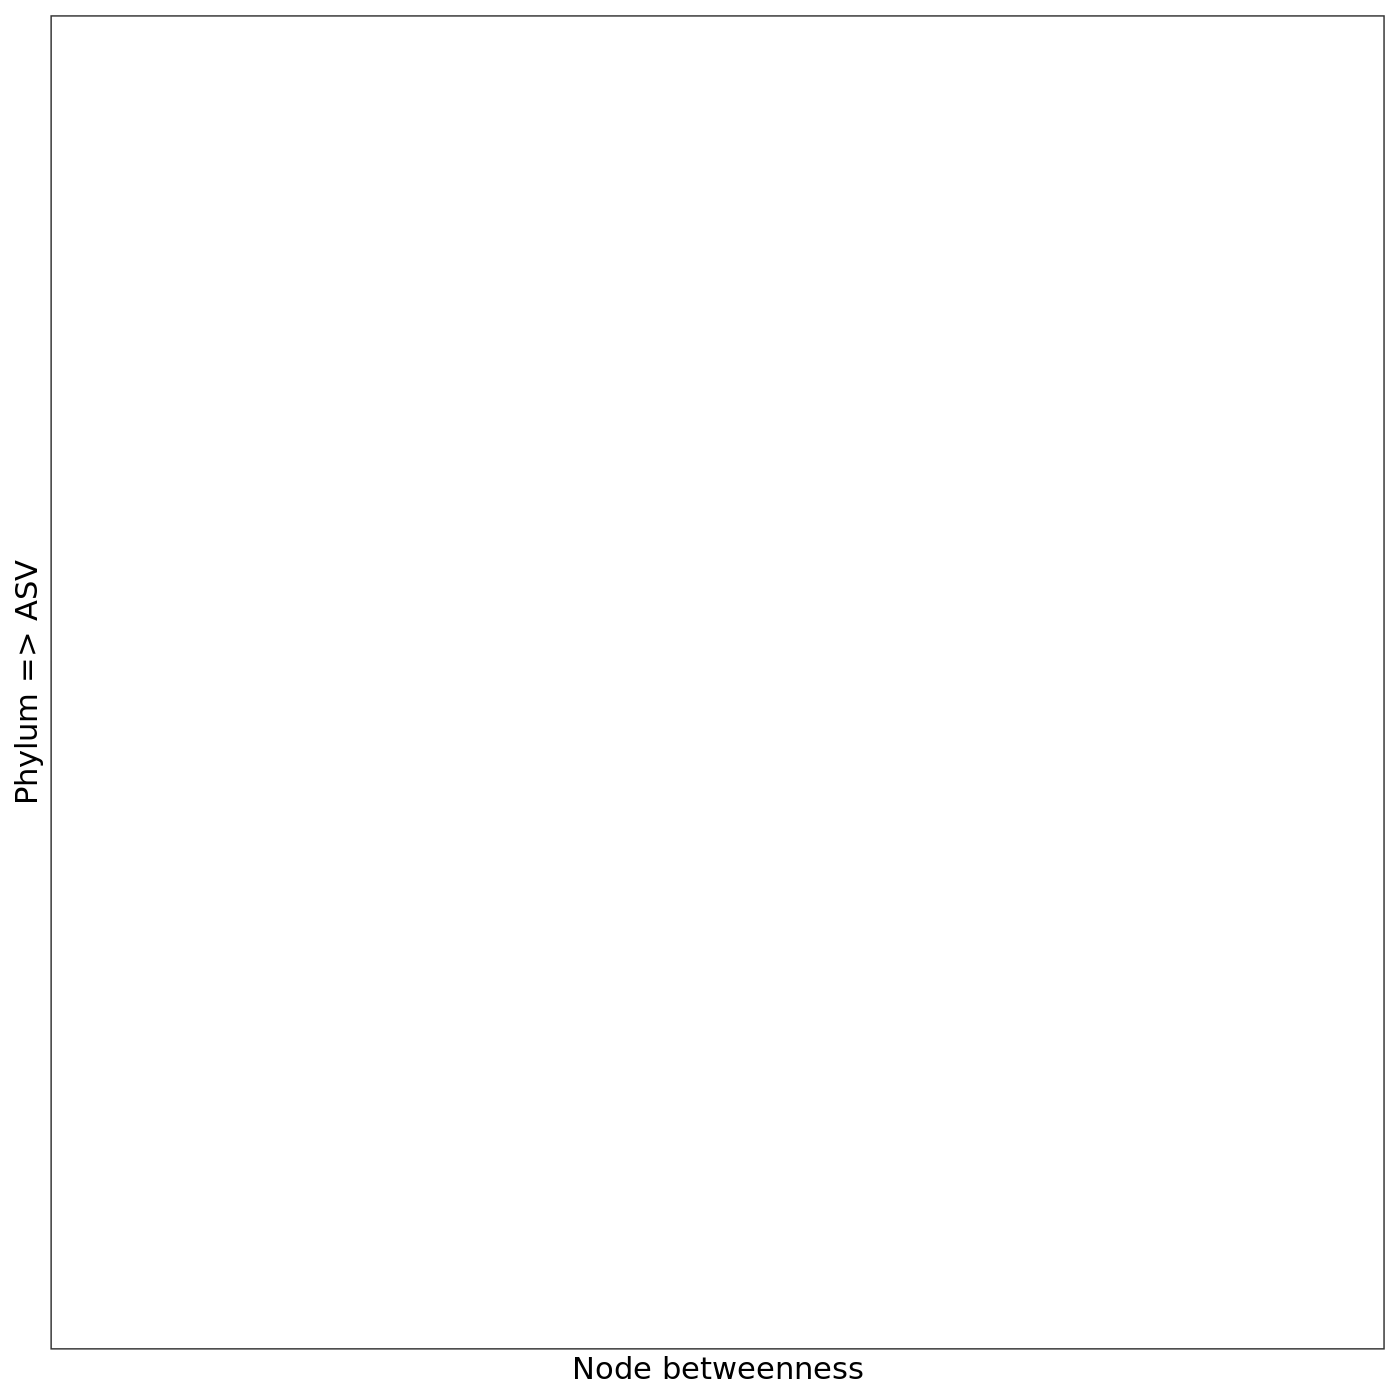

In [64]:
p = df %>%
    mutate(Taxonomy = stringr::str_wrap(Taxonomy, 70),
           Taxonomy = Taxonomy %>% reorder(centrality_btw)) %>%
    ggplot(aes(Taxonomy, centrality_btw, fill=community)) +
    geom_bar(stat='identity') +
    scale_fill_discrete('Subnetwork') +
    labs(x='Phylum => ASV', y='Node betweenness') +
    coord_flip() +
    theme_bw() +
    theme(
        axis.text.y = element_text(size=8)
    )

p.dims(7,7)
plot(p)

## Distribution of subnetworks across hosts

In [74]:
G_f %>%
    activate(edges) %>%
    filter(sign == 1)

# A tbl_graph: 185 nodes and 560 edges
#
# A directed acyclic simple graph with 36 components
#
# Edge Data: 560 x 13 (active)
   from    to exp_cooccur obs_cooccur prob_cooccur  p_lt  p_gt  q_lt  q_gt
  <int> <int>       <dbl>       <dbl>        <dbl> <dbl> <dbl> <int> <dbl>
1     1     2           0           1        0.001     1     0     1     0
2     1     3           0           1        0.001     1     0     1     0
3     2     3           0           1        0.001     1     0     1     0
4     1     5           0           1        0.001     1     0     1     0
5     2     5           0           1        0.001     1     0     1     0
6     3     5           0           1        0.001     1     0     1     0
# … with 554 more rows, and 4 more variables: mean_effects <dbl>,
#   sd_effects <dbl>, sign <int>, weight <dbl>
#
# Node Data: 185 x 13
  name  Domain Phylum Class Order Family Genus Species centrality_btw
  <chr> <chr>  <chr>  <chr> <chr> <chr>  <chr> <chr>            <d

In [65]:
# graph nodes w/ subnetwork info
nodes = G_f %>% 
    activate(nodes) %>%
    as.data.frame
nodes

name,Domain,Phylum,Class,Order,Family,Genus,Species,centrality_btw,centrality_hub,centrality_degree,community,d
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
c5fbed2bb10ab3a08275a92e9caea3c1,Archaea,Euryarchaeota,Halobacteria,Halobacteriales,Haloferacaceae,Halohasta,unclassified,0,9.567129e-18,0.4878049,1,22.25000
1936b1a270b058c5754be0addc7c7c31,Archaea,Euryarchaeota,Halobacteria,Halobacteriales,Haloferacaceae,Halohasta,unclassified,0,6.611097e-17,0.4878049,1,22.38095
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
b171d5cdecd235e7199d44ce8991794d,Archaea,Euryarchaeota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanobrevibacter,Haemonchus placei,0,3.040517e-17,0,2,9.2
d7dd0bdd8184f8cb7189e1e09afa97d0,Archaea,Euryarchaeota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanobrevibacter,Haemonchus placei,0,0.000000e+00,0,33,1.0


In [66]:
# OTU abundance & sample metadata
otu_f = otu %>%
    mutate(OTU = rownames(.)) %>%
    gather(sample, abundance, -OTU) %>%
    mutate(abundance = abundance * 100) %>%
    inner_join(meta, c('sample'='SampleID')) %>%
    inner_join(nodes, c('OTU'='name'))

otu_f %>% .$OTU %>% unique %>% length
otu_f

[1] 185

OTU,sample,abundance,class,order,family,genus,scientific_name,diet,digestive_system,⋯,Class,Order,Family,Genus,Species,centrality_btw,centrality_hub,centrality_degree,community,d
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
c5fbed2bb10ab3a08275a92e9caea3c1,F35_Red_Deer,0,Mammalia,Artiodactyla,Cervidae,Cervus,Cervus_elaphus,herbivore,foregut,⋯,Halobacteria,Halobacteriales,Haloferacaceae,Halohasta,unclassified,0,9.567129e-18,0.4878049,1,22.25000
1936b1a270b058c5754be0addc7c7c31,F35_Red_Deer,0,Mammalia,Artiodactyla,Cervidae,Cervus,Cervus_elaphus,herbivore,foregut,⋯,Halobacteria,Halobacteriales,Haloferacaceae,Halohasta,unclassified,0,6.611097e-17,0.4878049,1,22.38095
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
b171d5cdecd235e7199d44ce8991794d,X67_European_Roe,0,Mammalia,Artiodactyla,Cervidae,Capreolus,Capreolus_capreolus,herbivore,foregut,⋯,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanobrevibacter,Haemonchus placei,0,3.040517e-17,0,2,9.2
d7dd0bdd8184f8cb7189e1e09afa97d0,X67_European_Roe,0,Mammalia,Artiodactyla,Cervidae,Capreolus,Capreolus_capreolus,herbivore,foregut,⋯,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanobrevibacter,Haemonchus placei,0,0.000000e+00,0,33,1.0


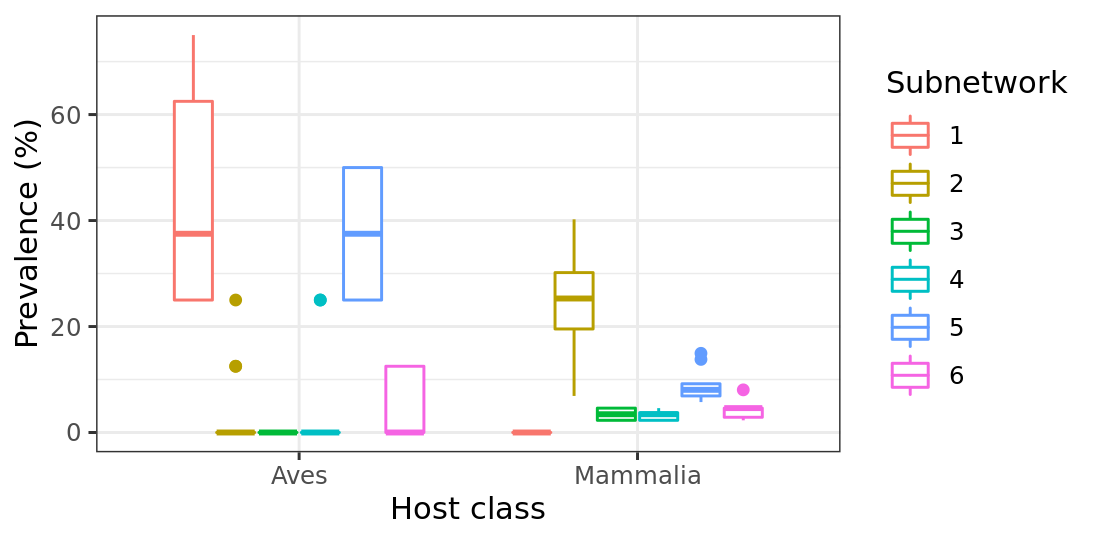

In [67]:
# plotting prevalence
p = otu_f %>%
    group_by(class) %>%
    mutate(n_samples = sample %>% unique %>% length) %>%
    group_by(community, class, OTU) %>%
    summarize(prev = sum(abundance > 0) / first(n_samples) * 100) %>%
    ungroup() %>%
    filter(as.Num(community) <= 6) %>%
    mutate(Subnetwork = community %>% as.character) %>%
    ggplot(aes(class, prev, color=Subnetwork)) +
    geom_boxplot() +
    labs(x='Host class', y='Prevalence (%)') +
    theme_bw()

p.dims(5.5,2.7)
plot(p)

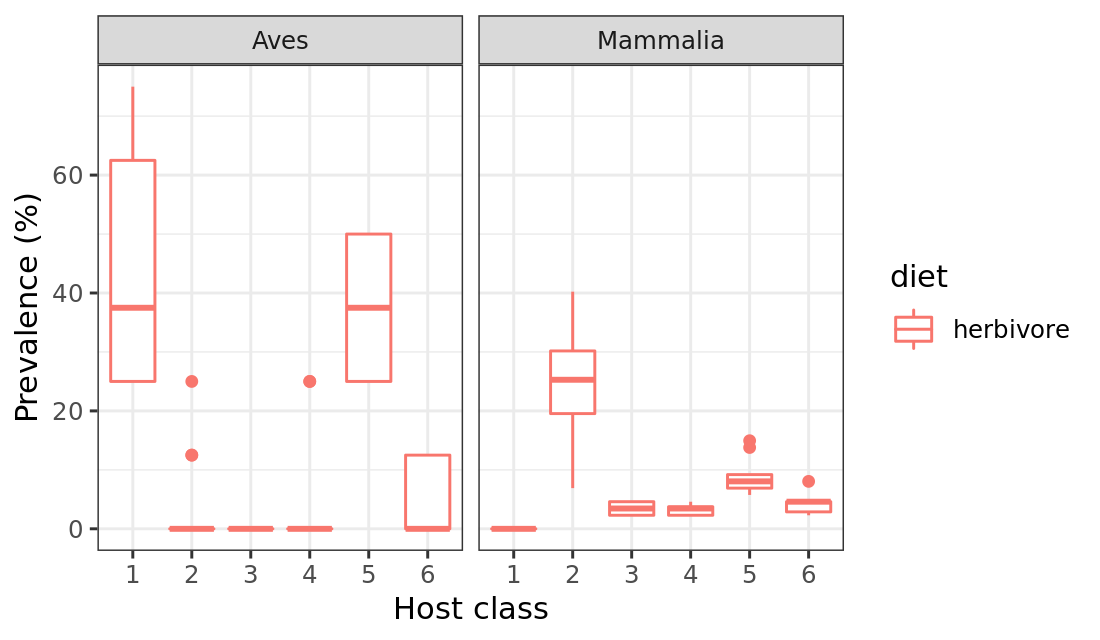

In [68]:
# plotting prevalence
p = otu_f %>%
    group_by(class, diet) %>%
    mutate(n_samples = sample %>% unique %>% length) %>%
    group_by(community, class, diet, OTU) %>%
    summarize(prev = sum(abundance > 0) / first(n_samples) * 100) %>%
    ungroup() %>%
    filter(as.Num(community) <= 6) %>%
    mutate(Subnetwork = community %>% as.character) %>%
    ggplot(aes(Subnetwork, prev, color=diet)) +
    geom_boxplot() +
    labs(x='Host class', y='Prevalence (%)') +
    facet_wrap(~ class) +
    theme_bw() 

p.dims(5.5,3.2)
plot(p)

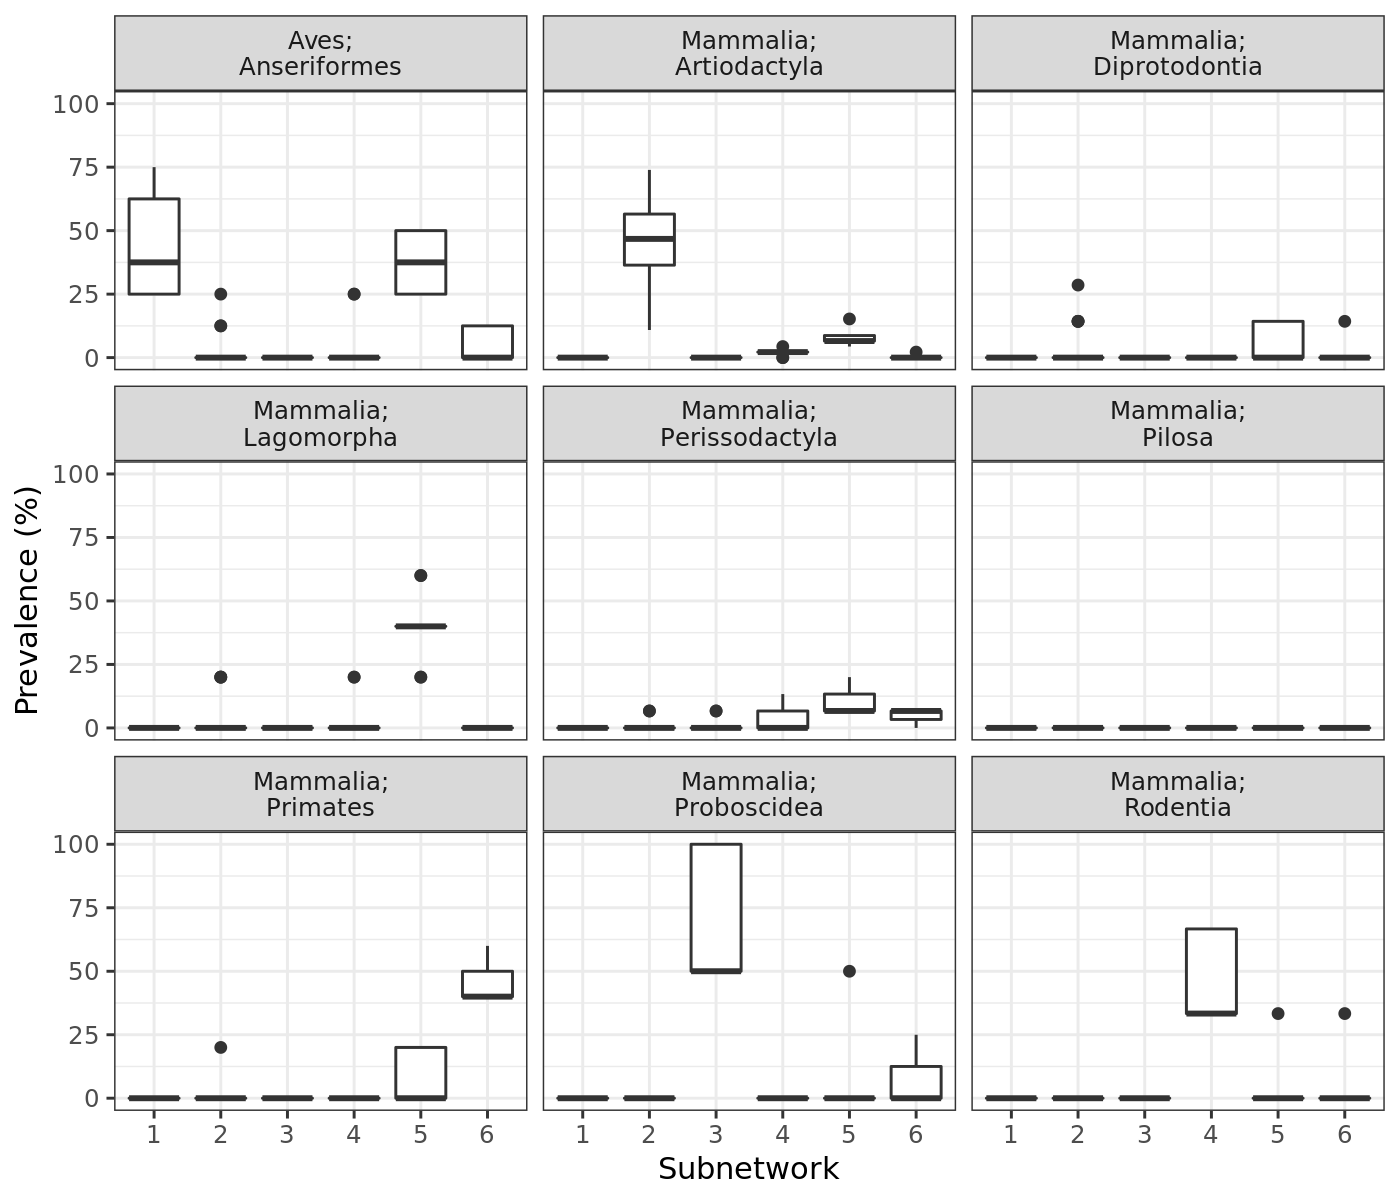

In [69]:
# plotting prevalence
p = otu_f %>%
    filter(class %in% c('Mammalia', 'Aves')) %>%
    mutate(class = paste(class, order, sep=';\n')) %>%
    group_by(class) %>%
    mutate(n_samples = sample %>% unique %>% length) %>%
    group_by(community, class, OTU) %>%
    summarize(prev = sum(abundance > 0) / first(n_samples) * 100) %>%
    ungroup() %>%
    filter(as.Num(community) <= 6) %>%
    mutate(Subnetwork = community %>% as.character) %>%
    ggplot(aes(Subnetwork, prev)) +
    geom_boxplot() +
    labs(x='Subnetwork', y='Prevalence (%)') +
    facet_wrap(~ class) +
    theme_bw() 

p.dims(7,6)
plot(p)

# sessionInfo

In [70]:
sessionInfo()

R version 3.6.2 (2019-12-12)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS/LAPACK: /ebio/abt3_projects/Georg_animal_feces/envs/phyloseq-eco/lib/libopenblasp-r0.3.7.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] parallel  stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] uuid_0.1-2        LeyLabRMisc_0.1.6 doParallel_1.0.15 iterators_1.0.12 
 [5] foreach_1.4.7     clustermq_0.8.9   ggraph_2.0.3      tidygraph_1.2.0  
 [9] cooccur_1.3       phyloseq_1.30.0   ape_5.3           tidytable_0.4.1  
[13] ggplot2_3.2.1     tidyr_1.0.0